# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils import Dataset, getDataset
import utils as u
import pandas as pd
import seaborn as sns
import time
import sklearnex
idx = pd.IndexSlice
pd.set_option('display.max_columns', 800)
pd.set_option('display.max_rows', 800)

In [3]:
sklearnex.patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [4]:
then = time.time()

# Read data

In [5]:
datasets = {}
datasets['duz boru h'] = pd.read_excel("../data/Boiling ANN data.xlsx", sheet_name="Düz boru H ", header=None)
datasets['mikrokanatli boru h'] = pd.read_excel("../data/Boiling ANN data.xlsx", sheet_name="Mikrokanatlı Boru H")
datasets['duz boru dp'] = pd.read_excel("../data/Boiling ANN data.xlsx", sheet_name="Düz Boru dP")
datasets['mikrokanatli boru dp'] = pd.read_excel("../data/Boiling ANN data.xlsx", sheet_name="Mikrokanatlı Boru dP")

datasets_processed = {}
datasets_processed['duz boru h'] = getDataset(pd.read_excel("../data/Boiling ANN data.xlsx", sheet_name="Düz boru H ", header=None))
datasets_processed['mikrokanatli boru h'] = getDataset(pd.read_excel("../data/Boiling ANN data.xlsx", sheet_name="Mikrokanatlı Boru H", header=None))
datasets_processed['duz boru dp'] = getDataset(pd.read_excel("../data/Boiling ANN data.xlsx", sheet_name="Düz Boru dP", header=None))
datasets_processed['mikrokanatli boru dp'] = getDataset(pd.read_excel("../data/Boiling ANN data.xlsx", sheet_name="Mikrokanatlı Boru dP", header=None))

data_h = pd.concat([
    datasets_processed['duz boru h'].assign(dataset='Plain tube h'),
    datasets_processed['mikrokanatli boru h'].assign(dataset='Microfin tube h')
], axis=0, ignore_index=True)


data_dp = pd.concat([
    datasets_processed['duz boru dp'].assign(dataset='Plain tube dp'),
    datasets_processed['mikrokanatli boru dp'].assign(dataset='Microfin tube dp')
], axis=0, ignore_index=True)



# data_h.to_pickle("../data/Boiling ANN data_h.pkl")
# data_dp.to_pickle("../data/Boiling ANN data_dp.pkl")

In [6]:
Xh = data_h.loc[:, idx[['Input Raw', 'Input Calculated'], :]]
yh = data_h['Output']
Xdp = data_dp.loc[:, idx[['Input Raw', 'Input Calculated'], :]]
ydp = data_dp['Output']
# pd.DataFrame(Xh).assign(y=yh).to_csv("../data/Boiling_ANN_data_h.csv", index=False)
# pd.DataFrame(Xdp).assign(y=ydp).to_csv("../data/Boiling_ANN_data_dp.csv", index=False)

In [7]:
# Rename using definitions in the markdown

data_h.T.drop(("Output", "Output 1")).reset_index(drop=True).rename(
    index={
        0: 'Mass flux',
        1: 'Saturation pressure',
        2: 'Heat flux',
        3: 'Quality',
        4: 'Pressure drop',
        # 5: 'Heat transfer coefficient',
        5: 'Reynolds number',
        6: 'Two-phase multiplier',
        7: 'Froude number',
        8: 'Weber number',
        9: 'Bond number',
        10: "Tube type"
    },
).T.assign(y=yh).rename(columns={'y': 'Heat transfer coefficient'}).sample(5).head().style.set_caption("Microfinned and Plain Tubes - h")


,Mass flux,Saturation pressure,Heat flux,Quality,Pressure drop,Reynolds number,Two-phase multiplier,Froude number,Weber number,Bond number,Tube type,Heat transfer coefficient
159,185.634073,488370.000000,15000.000000,0.552524,5987.000000,3192.310540,0.154071,0.263583,25.303465,0.116771,Microfin tube h,5316.385315
74,285.590881,477666.745707,14769.329749,0.303845,3486.000000,7574.756811,0.388607,0.621464,59.177150,0.265139,Plain tube h,3936.708981
36,380.787842,473489.389879,10265.325703,0.299655,6883.000000,10126.005292,0.393937,1.103053,104.706616,0.268122,Plain tube h,3448.329644
114,190.393921,488370.000000,10112.758282,0.485909,4961.000000,3761.587993,0.195966,0.277273,26.617714,0.144606,Microfin tube h,4877.910710
121,285.590881,472880.000000,10227.250791,0.416650,10111.000000,6322.749821,0.248248,0.620368,58.858936,0.177834,Microfin tube h,4964.999599


In [8]:
# Rename using definitions in the markdown

data_dp.T.drop(("Output", "Output 1")).reset_index(drop=True).rename(
    index={
        0: 'Mass flux',
        1: 'Saturation pressure',
        2: 'Heat flux',
        3: 'Quality',
        # 4: 'Pressure drop',
        4: 'Heat transfer coefficient',
        5: 'Reynolds number',
        6: 'Two-phase multiplier',
        7: 'Froude number',
        8: 'Weber number',
        9: 'Bond number',
        10: "Tube type"
    },
).T.assign(y=ydp).rename(columns={'y': 'Pressure drop'}).sample(5).head().style.set_caption("Microfinned and Plain Tubes - $\Delta P$")


,Mass flux,Saturation pressure,Heat flux,Quality,Heat transfer coefficient,Reynolds number,Two-phase multiplier,Froude number,Weber number,Bond number,Tube type,Pressure drop
11,299.870425,582291.959392,10224.078789,0.611808,4347.730765,4798.350812,0.134858,0.710832,73.057215,0.105697,Plain tube dp,9227.000000
112,195.153769,488370.000000,10080.083781,0.358771,4884.098569,4809.147619,0.314138,0.291310,27.965236,0.219966,Microfin tube dp,3781.000000
29,285.590881,476586.153855,10234.390518,0.466034,3443.867088,5804.871013,0.208046,0.621164,59.102788,0.152114,Plain tube dp,6037.000000
42,371.268146,472901.084274,10280.793296,0.619863,5723.197532,5356.245762,0.118095,1.048421,99.472640,0.091879,Plain tube dp,16572.000000
173,376.027994,488370.000000,15000.000000,0.614016,7935.949485,nan,0.122658,1.081539,103.825722,0.095348,Microfin tube dp,23278.000000


# HTP

In [9]:
htp = u.Dataset(data=data_h, X=Xh, y=yh)
htp.setRenameFunc(u.renameH)
htp.setColNames(u.H_NAMES)
htp.setDec(u.getDecPipeline())
htp.decompose()
htp.displayDecompositionResults()
htp.setClusterer(u.getClusterer())
htp.setCategories()
htp.split(random_state=42, test_size=0.2)
htp.defineCats()
htp.setScoring(u.SCORING)
# htp.addModel(u.getDummy(), 'Dummy')
# htp.addModel(u.getDummy(), 'Mummy')
htp.addModel(u.getANN(), 'ANN')
htp.addModel(u.getLwr(), 'LWR')
htp.addModel(u.getGBM(), 'GBM')


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 390
[LightGBM] [Info] Number of data points in the train set: 139, number of used features: 10
[LightGBM] [Info] Start training from score 5002.499283


EDA

In [10]:
display(htp.displayEDA())


c:\Users\berk_\OneDrive\JWorkspace\cihan\ml_calismasi\notebook\utils.py:247: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data = self.data.groupby('dataset').agg(['mean']).T \


Decomposition

In [11]:
display(htp.displayDecompositionResults())

,PCA1,PCA2
Mass flux,0.371403,0.336128
Saturation pressure,0.035643,-0.027975
Heat flux,-0.031835,0.044657
Quality,-0.338355,0.365280
Pressure drop,0.072366,0.519421
Reynolds number,0.456948,-0.059758
Two-phase multiplier,0.348064,-0.364637
Froude number,0.379246,0.325789
Weber number,0.380145,0.321854
Bond number,0.348953,-0.367088


Clusters

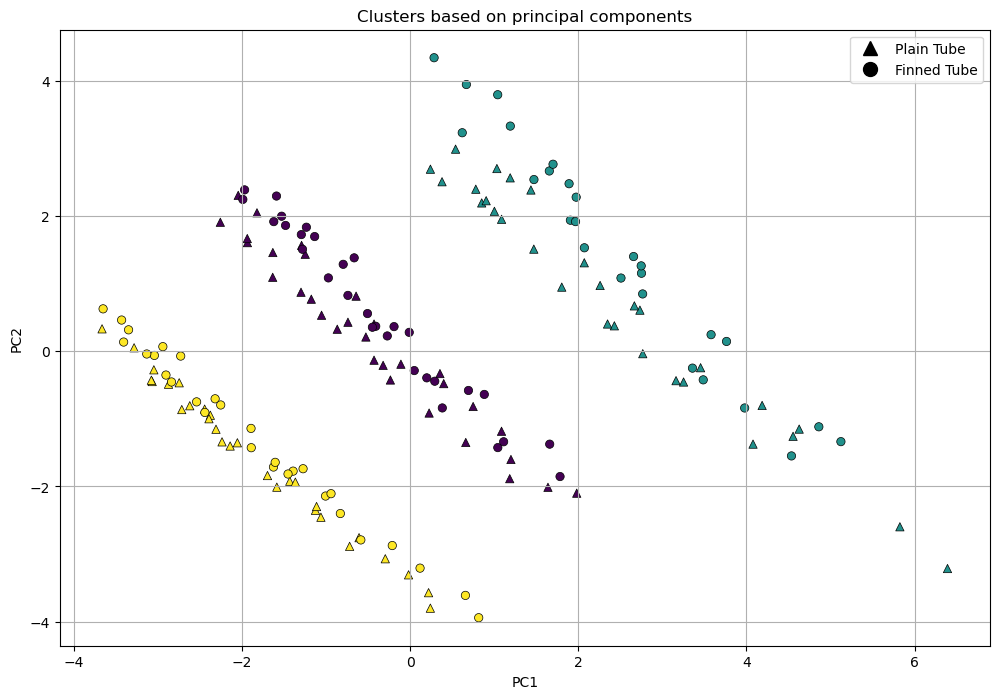

c:\Users\berk_\OneDrive\JWorkspace\cihan\ml_calismasi\notebook\utils.py:387: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(self.Xdec[f1, 0], self.Xdec[f1, 1],
c:\Users\berk_\OneDrive\JWorkspace\cihan\ml_calismasi\notebook\utils.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(self.Xdec[f2, 0], self.Xdec[f2, 1],


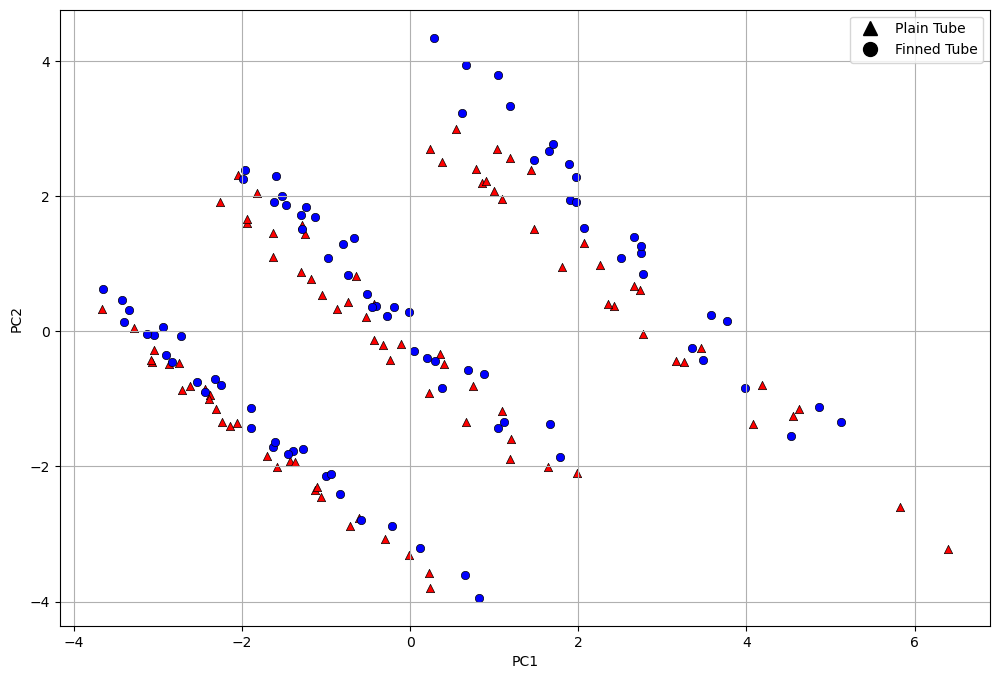

In [12]:
htp.visualizeClusters()

Test Results

In [13]:
htp.displayAllModelTestResults()

,ANN,LWR,GBM
R2,0.602048,0.849524,0.699352
RMSE,738.564436,454.156983,641.951422
MAE,447.929015,350.684576,511.085597
MAPE,0.083834,0.068111,0.105206
Bias%,0.011003,-0.005086,0.005403
WAPE%,0.100207,0.070635,0.107487
Pearson-R,0.729676,0.850604,0.700007


Plot Predictions

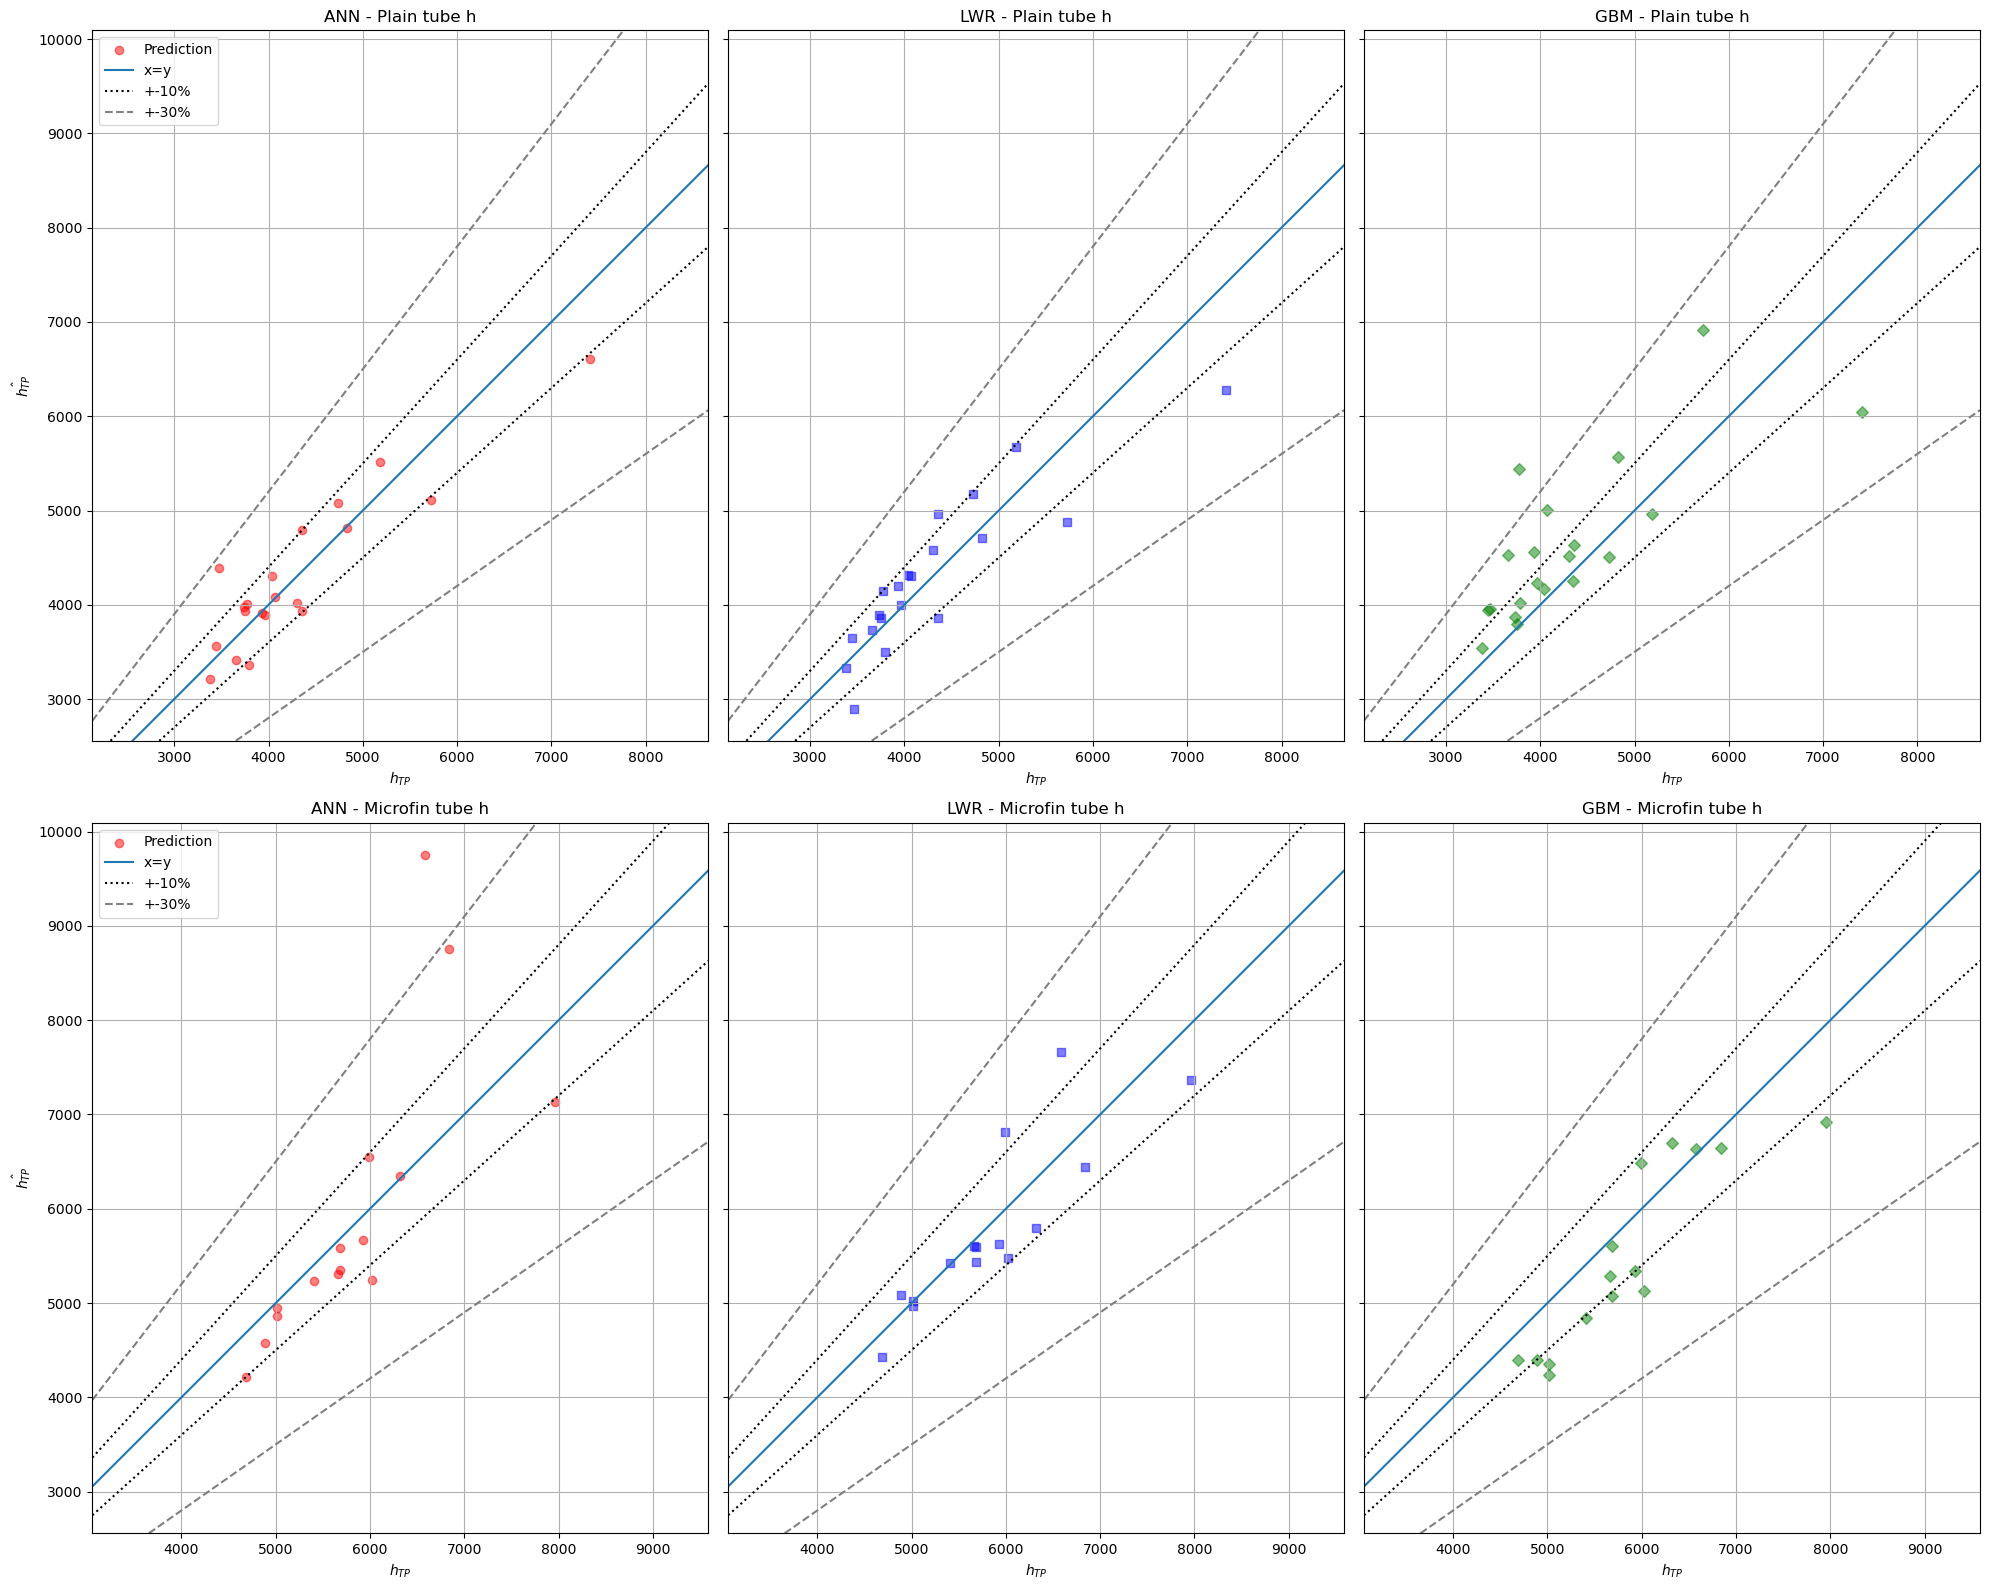

In [14]:
htp.plot_predictions()

Pair plots

d:\conda_envs\ann\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


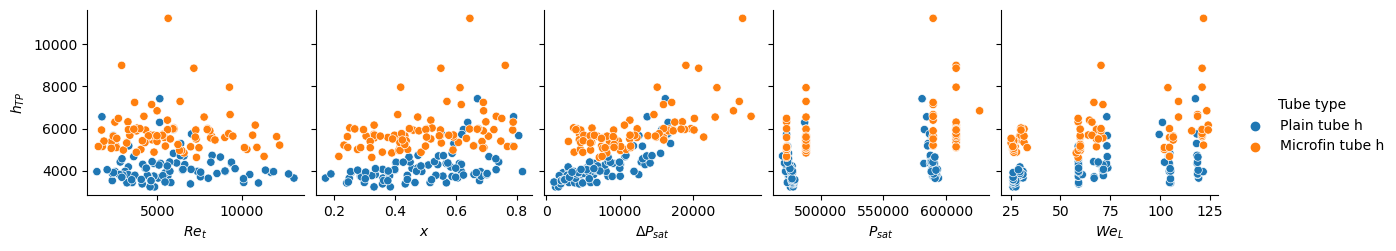

d:\conda_envs\ann\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


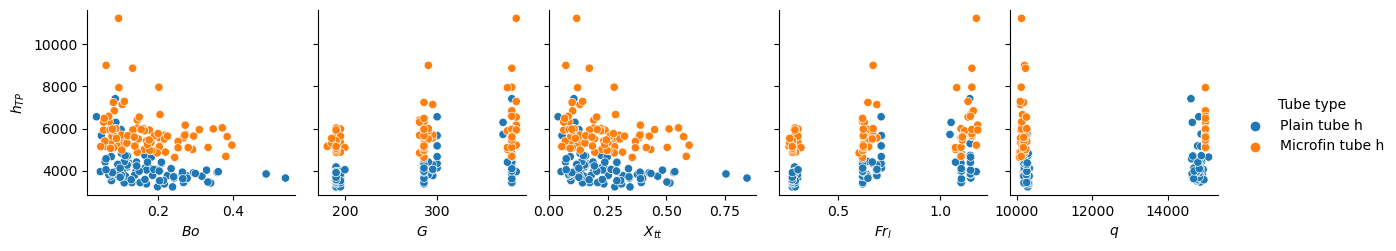

In [15]:
htp.displayPairs(target_var='Heat transfer coefficient', row_len=5)

Histograms

d:\conda_envs\ann\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


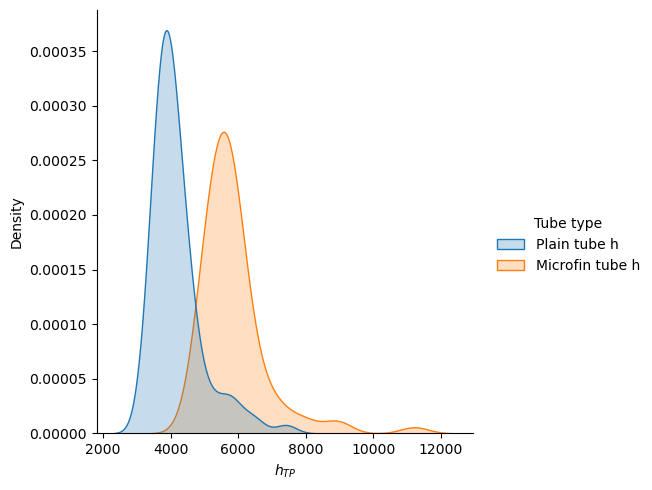

In [16]:
htp.displayHistogram(target_var='Heat transfer coefficient')

Params results

In [17]:
for m in htp.models_cv:
    print(m)
    _ = u.process_ann_results(htp.models_cv[m], m)[0]
    _.to_csv("../output/htp_normal_{}.csv".format(m), index=False)
    display(_.sort_values("test_R2", ascending=False).head(15))

ANN


,fit_time,score_time,test_R2,train_R2,test_RMSE,train_RMSE,test_MAE,train_MAE,test_MAPE,train_MAPE,test_Bias%,train_Bias%,test_WAPE%,train_WAPE%,test_Pearson-R,train_Pearson-R
ANN,,,,,,,,,,,,,,,,
"((regressor activation, relu), (regressor alpha, 0.01), (regressor hidden_layer_sizes, (50, 50)), (regressor solver, adam), (regressor tol, 1e-05))",0.861611,0.015666,0.814607,0.995407,-507.337686,-82.115124,-374.309751,-50.523314,-0.074872,-0.010635,0.005667,0.000036,-0.075470,-0.010130,0.830100,0.995425
"((regressor activation, relu), (regressor alpha, 0.0001), (regressor hidden_layer_sizes, (50, 50)), (regressor solver, adam), (regressor tol, 1e-05))",0.806953,0.015007,0.808049,0.995527,-516.423964,-80.404150,-383.316113,-48.502334,-0.076774,-0.010155,0.006296,-0.000030,-0.077138,-0.009733,0.824449,0.995538
"((regressor activation, relu), (regressor alpha, 0.0001), (regressor hidden_layer_sizes, (128, 64, 32, 16, 8)), (regressor solver, adam), (regressor tol, 1e-05))",1.158030,0.018179,0.806611,0.998554,-516.995440,-46.114746,-370.185727,-24.873300,-0.071649,-0.005211,0.013675,0.000297,-0.075100,-0.004972,0.827330,0.998558
"((regressor activation, relu), (regressor alpha, 0.0001), (regressor hidden_layer_sizes, (50, 50)), (regressor solver, sgd), (regressor tol, 1e-05))",2.865894,0.012173,0.799417,0.942582,-532.710374,-292.251297,-381.005591,-214.344949,-0.074113,-0.043061,0.000389,-0.000086,-0.076703,-0.043208,0.821363,0.943200
"((regressor activation, relu), (regressor alpha, 0.01), (regressor hidden_layer_sizes, (50, 50)), (regressor solver, sgd), (regressor tol, 1e-05))",3.233424,0.013177,0.799315,0.942049,-532.941434,-293.622675,-381.008401,-214.969750,-0.074090,-0.043122,0.000403,-0.000104,-0.076700,-0.043348,0.821429,0.942688
"((regressor activation, relu), (regressor alpha, 0.01), (regressor hidden_layer_sizes, (128, 64, 32, 16, 8)), (regressor solver, lbfgs), (regressor tol, 1e-05))",17.668398,0.013509,0.799081,0.999980,-525.154320,-5.402423,-360.264420,-3.467452,-0.069600,-0.000770,0.009668,0.000012,-0.072423,-0.000693,0.815879,0.999980
"((regressor activation, relu), (regressor alpha, 0.01), (regressor hidden_layer_sizes, (128, 64, 32, 16, 8)), (regressor solver, adam), (regressor tol, 1e-05))",1.468496,0.014674,0.797645,0.998379,-528.723478,-48.804423,-362.580656,-26.859868,-0.069530,-0.005734,0.009351,-0.000782,-0.074324,-0.005383,0.816210,0.998393
"((regressor activation, relu), (regressor alpha, 0.01), (regressor hidden_layer_sizes, (20, 20)), (regressor solver, sgd), (regressor tol, 1e-05))",2.315364,0.016509,0.795899,0.931083,-536.564800,-319.591044,-411.030586,-247.595416,-0.081437,-0.050309,0.002097,0.000703,-0.082677,-0.049773,0.807547,0.931513
"((regressor activation, relu), (regressor alpha, 0.0001), (regressor hidden_layer_sizes, (20, 20)), (regressor solver, sgd), (regressor tol, 1e-05))",2.273649,0.018670,0.795795,0.931839,-536.605357,-317.831156,-410.626766,-245.980210,-0.081328,-0.049988,0.002201,0.000710,-0.082581,-0.049438,0.807372,0.932253


LWR


,fit_time,score_time,test_R2,test_RMSE,test_MAE,test_MAPE,test_Bias%,test_WAPE%,test_Pearson-R
LWR,,,,,,,,,
"((regressor gamma, 2), (regressor n_neighbors, 20))",0.014663,0.105196,0.680406,-650.479974,-403.811553,-0.077172,-0.010810,-0.081545,0.724199
"((regressor gamma, 1), (regressor n_neighbors, 20))",0.015331,0.108202,0.679505,-654.577211,-420.174360,-0.080582,-0.019399,-0.084914,0.728270
"((regressor gamma, 1), (regressor n_neighbors, 15))",0.017018,0.102864,0.678596,-649.220104,-420.465356,-0.080327,-0.017479,-0.085530,0.731078
"((regressor gamma, 0.7), (regressor n_neighbors, 15))",0.014667,0.162215,0.675171,-653.151951,-429.762638,-0.082242,-0.020516,-0.087528,0.731661
"((regressor gamma, 0.7), (regressor n_neighbors, 20))",0.016841,0.118707,0.672703,-662.909596,-435.113348,-0.083769,-0.022883,-0.088016,0.725664
"((regressor gamma, 2), (regressor n_neighbors, 15))",0.014004,0.100198,0.670396,-658.122540,-418.515795,-0.079996,-0.010458,-0.084802,0.717977
"((regressor gamma, 3), (regressor n_neighbors, 20))",0.015173,0.087182,0.641175,-685.823347,-425.282487,-0.081625,-0.007251,-0.085928,0.698137
"((regressor gamma, 3), (regressor n_neighbors, 15))",0.017670,0.107702,0.625325,-700.762887,-446.921697,-0.085646,-0.007765,-0.089954,0.684526
"((regressor gamma, 0.7), (regressor n_neighbors, 10))",0.011838,0.104194,0.423290,-834.024064,-525.240088,-0.101707,-0.009960,-0.100064,0.619877


GBM


,fit_time,score_time,test_R2,test_RMSE,test_MAE,test_MAPE,test_Bias%,test_WAPE%,test_Pearson-R
GBM,,,,,,,,,
"((regressor num_leaves, 8), (regressor reg_alpha, 3), (regressor reg_lambda, 0.5))",0.302885,0.012336,0.585681,-778.936420,-561.853347,-0.110369,-0.00524,-0.113274,0.624553
"((regressor num_leaves, 32), (regressor reg_alpha, 3), (regressor reg_lambda, 0.5))",0.279224,0.013001,0.585681,-778.936420,-561.853347,-0.110369,-0.00524,-0.113274,0.624553
"((regressor num_leaves, 512), (regressor reg_alpha, 3), (regressor reg_lambda, 0.5))",0.377758,0.011666,0.585681,-778.936420,-561.853347,-0.110369,-0.00524,-0.113274,0.624553
"((regressor num_leaves, 128), (regressor reg_alpha, 3), (regressor reg_lambda, 0.5))",0.306562,0.011839,0.585681,-778.936420,-561.853347,-0.110369,-0.00524,-0.113274,0.624553
"((regressor num_leaves, 256), (regressor reg_alpha, 3), (regressor reg_lambda, 0.5))",0.386089,0.011999,0.585681,-778.936420,-561.853347,-0.110369,-0.00524,-0.113274,0.624553
"((regressor num_leaves, 4), (regressor reg_alpha, 3), (regressor reg_lambda, 0.5))",0.246220,0.011999,0.585681,-778.936420,-561.853347,-0.110369,-0.00524,-0.113274,0.624553
"((regressor num_leaves, 64), (regressor reg_alpha, 3), (regressor reg_lambda, 0.5))",0.280558,0.013667,0.585681,-778.936420,-561.853347,-0.110369,-0.00524,-0.113274,0.624553
"((regressor num_leaves, 16), (regressor reg_alpha, 3), (regressor reg_lambda, 0.5))",0.290898,0.012335,0.585681,-778.936420,-561.853347,-0.110369,-0.00524,-0.113274,0.624553
"((regressor num_leaves, 16), (regressor reg_alpha, 4), (regressor reg_lambda, 0.5))",0.263546,0.011840,0.585678,-778.939639,-561.859088,-0.110370,-0.00524,-0.113275,0.624549


# DP

In [18]:
dp = u.Dataset(data=data_dp, X=Xdp, y=ydp)
dp.setRenameFunc(u.renameDP)
dp.setColNames(u.DP_NAMES)
dp.setDec(u.getDecPipeline())
dp.decompose()
dp.displayDecompositionResults()
dp.setClusterer(u.getClusterer())
dp.setCategories()
dp.split(random_state=42, test_size=0.2)
dp.defineCats()
dp.setScoring(u.SCORING)
# dp.addModel(u.getDummy(), 'Dummy')
# dp.addModel(u.getDummy(), 'Mummy')
dp.addModel(u.getANN(), 'ANN')
dp.addModel(u.getLwr(), 'LWR')
dp.addModel(u.getGBM(), 'GBM')


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 390
[LightGBM] [Info] Number of data points in the train set: 139, number of used features: 10
[LightGBM] [Info] Start training from score 9494.690590


EDA

In [19]:
dp.displayEDA()

c:\Users\berk_\OneDrive\JWorkspace\cihan\ml_calismasi\notebook\utils.py:247: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data = self.data.groupby('dataset').agg(['mean']).T \


Decomposition

In [20]:
dp.displayDecompositionResults()

,PCA1,PCA2
Mass flux,0.356427,0.382785
Saturation pressure,0.036562,0.039049
Heat flux,-0.033376,0.046485
Quality,-0.354867,0.371620
Heat transfer coefficient,0.000527,0.399495
Reynolds number,0.459966,-0.030665
Two-phase multiplier,0.364303,-0.364237
Froude number,0.364743,0.376505
Weber number,0.365797,0.378266
Bond number,0.365306,-0.365571


Clusters

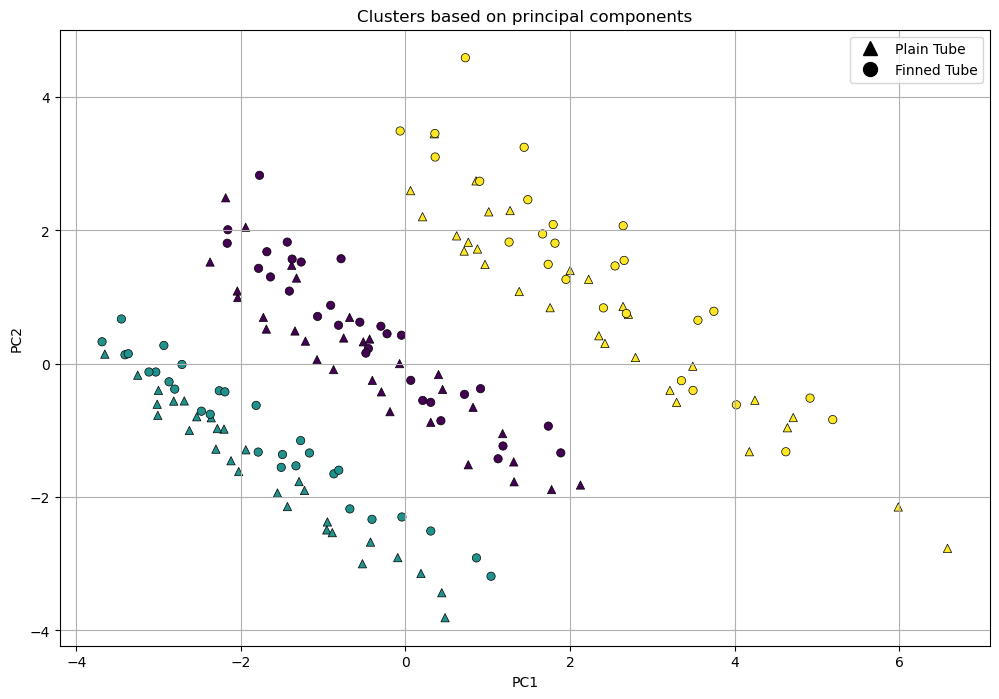

c:\Users\berk_\OneDrive\JWorkspace\cihan\ml_calismasi\notebook\utils.py:387: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(self.Xdec[f1, 0], self.Xdec[f1, 1],
c:\Users\berk_\OneDrive\JWorkspace\cihan\ml_calismasi\notebook\utils.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(self.Xdec[f2, 0], self.Xdec[f2, 1],


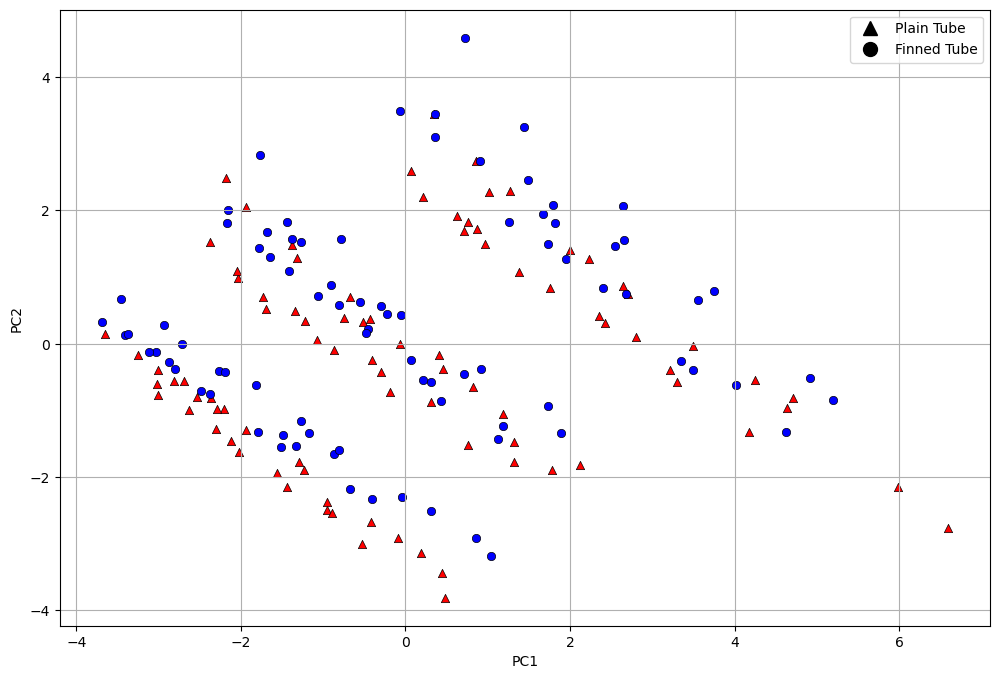

In [21]:
dp.visualizeClusters(fil1='Plain tube dp', fil2='Microfin tube dp')

Test results

In [22]:
dp.displayAllModelTestResults()

,ANN,LWR,GBM
R2,0.876092,0.890873,0.886883
RMSE,2128.738423,1997.743085,2033.932503
MAE,1313.888409,1179.350101,1255.277313
MAPE,0.147334,0.126541,0.149837
Bias%,0.020617,0.038111,-0.005568
WAPE%,0.139675,0.121481,0.127730
Pearson-R,0.877317,0.895021,0.891236


Display predictions

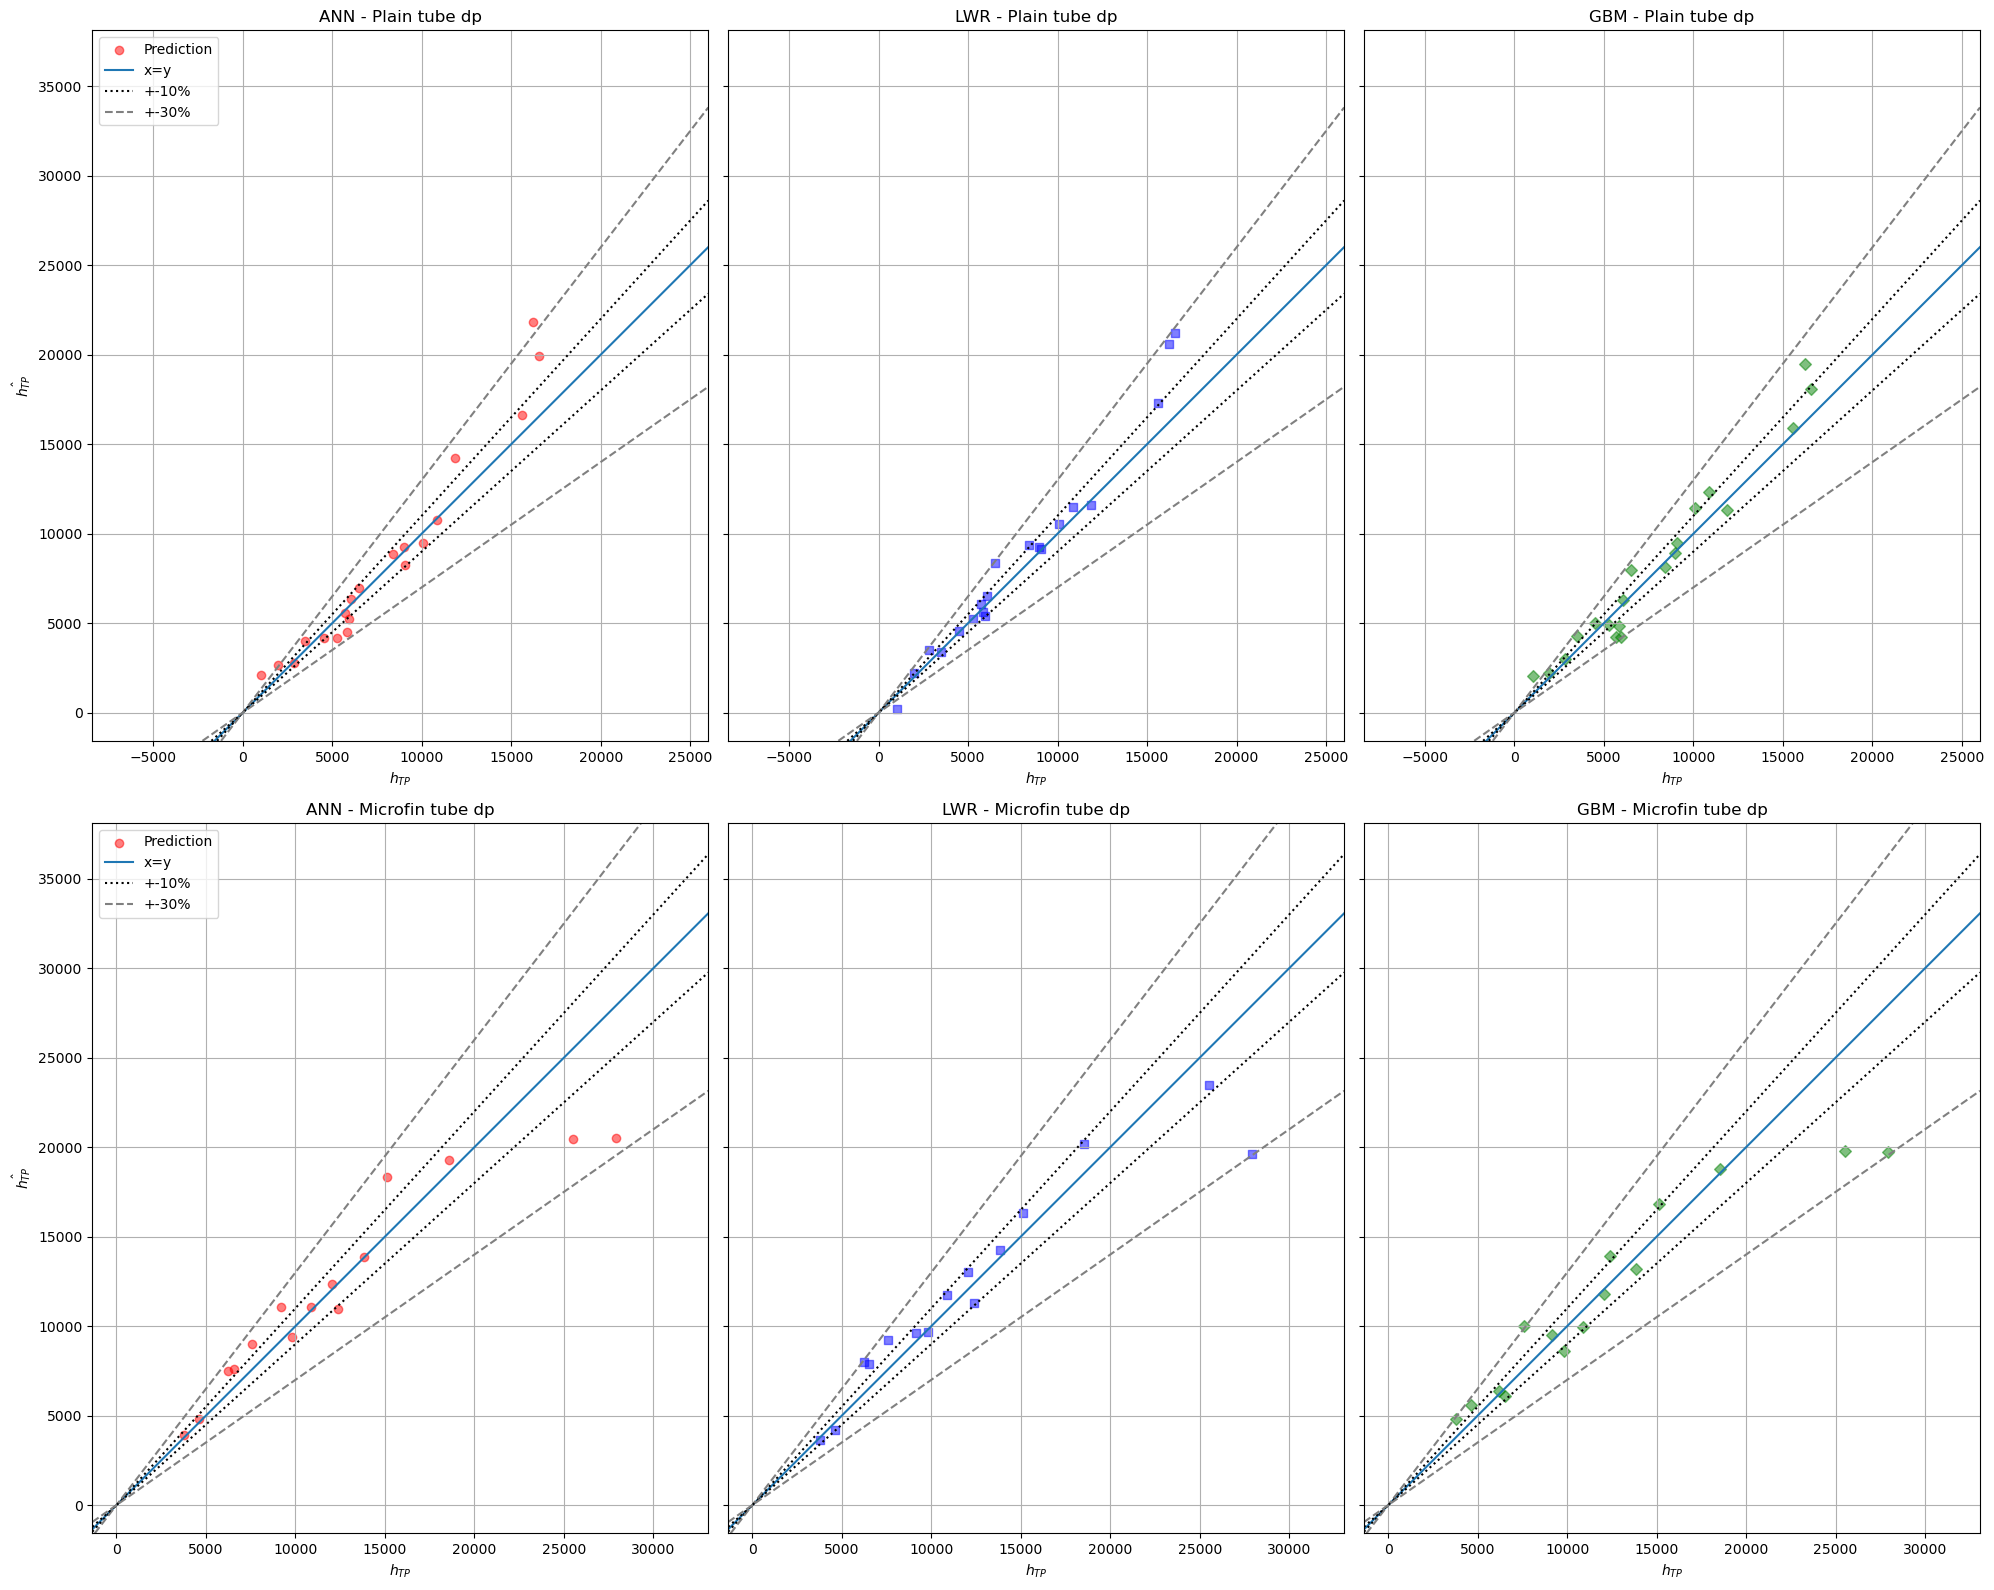

In [23]:
dp.plot_predictions()

Pair plots

d:\conda_envs\ann\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


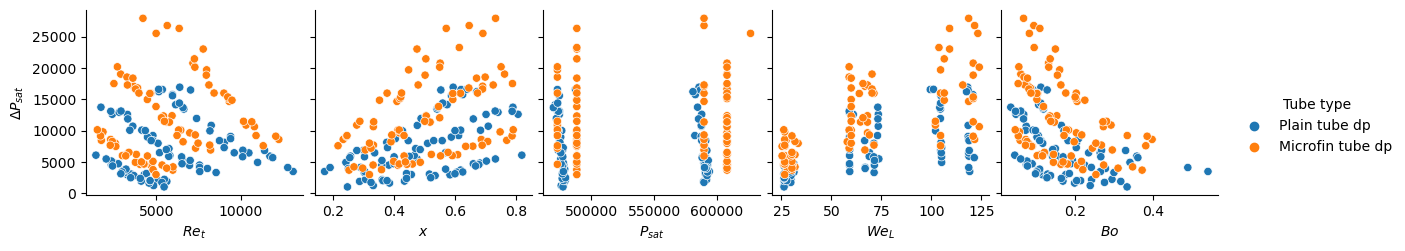

d:\conda_envs\ann\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


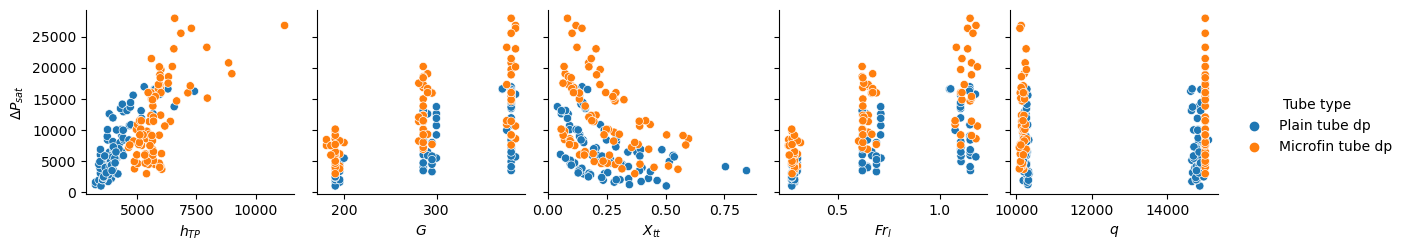

In [24]:
dp.displayPairs(target_var='Pressure drop', row_len=5)

Histograms

d:\conda_envs\ann\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


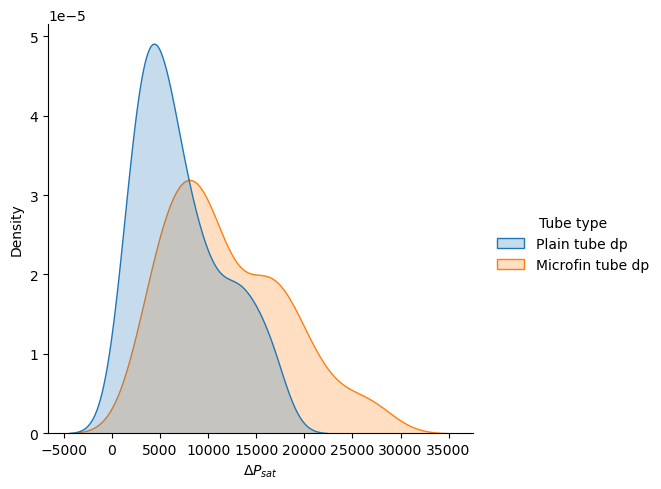

In [25]:
dp.displayHistogram(target_var='Pressure drop')

Params Results

In [26]:
for m in dp.models_cv:
    _ = u.process_ann_results(dp.models_cv[m], m)[0]
    _.to_csv("../output/dp_normal_{}.csv".format(m), index=False)
    display(_.sort_values("test_R2", ascending=False).head(15))

,fit_time,score_time,test_R2,train_R2,test_RMSE,train_RMSE,test_MAE,train_MAE,test_MAPE,train_MAPE,test_Bias%,train_Bias%,test_WAPE%,train_WAPE%,test_Pearson-R,train_Pearson-R
ANN,,,,,,,,,,,,,,,,
"((regressor activation, relu), (regressor alpha, 0.01), (regressor hidden_layer_sizes, (128, 64, 32, 16, 8)), (regressor solver, sgd), (regressor tol, 1e-05))",2.656880,0.012999,0.932091,0.977557,-1489.957667,-862.640915,-1101.256593,-615.006340,-0.144456,-0.081511,-0.005333,-0.001203,-0.123221,-0.066338,0.938012,0.977630
"((regressor activation, relu), (regressor alpha, 0.0001), (regressor hidden_layer_sizes, (128, 64, 32, 16, 8)), (regressor solver, sgd), (regressor tol, 1e-05))",2.856132,0.013334,0.932081,0.977625,-1490.075723,-861.312296,-1101.516852,-614.094039,-0.144470,-0.081352,-0.005328,-0.001184,-0.123241,-0.066231,0.938005,0.977696
"((regressor activation, relu), (regressor alpha, 0.01), (regressor hidden_layer_sizes, (50, 50)), (regressor solver, sgd), (regressor tol, 1e-05))",1.230662,0.013336,0.930258,0.967942,-1498.415244,-1030.655106,-1115.212375,-747.346606,-0.130227,-0.090027,-0.003352,0.001498,-0.121934,-0.080096,0.932014,0.967999
"((regressor activation, relu), (regressor alpha, 0.0001), (regressor hidden_layer_sizes, (50, 50)), (regressor solver, sgd), (regressor tol, 1e-05))",1.147452,0.014665,0.930256,0.967975,-1498.398536,-1030.132561,-1115.216846,-746.977330,-0.130227,-0.089983,-0.003358,0.001500,-0.121930,-0.080055,0.932017,0.968030
"((regressor activation, relu), (regressor alpha, 0.01), (regressor hidden_layer_sizes, (50, 50)), (regressor solver, adam), (regressor tol, 1e-05))",0.670586,0.018507,0.926462,0.995852,-1519.912299,-367.790544,-1074.973418,-237.593898,-0.125110,-0.028908,-0.004567,0.000015,-0.117987,-0.025351,0.930983,0.995864
"((regressor activation, relu), (regressor alpha, 0.0001), (regressor hidden_layer_sizes, (128, 64, 32, 16, 8)), (regressor solver, lbfgs), (regressor tol, 1e-05))",1.941665,0.014000,0.925337,0.999998,-1562.356610,-6.136096,-1115.635432,-2.855962,-0.135688,-0.000738,-0.016802,-0.000025,-0.125661,-0.000300,0.929647,0.999998
"((regressor activation, relu), (regressor alpha, 0.0001), (regressor hidden_layer_sizes, (50, 50)), (regressor solver, adam), (regressor tol, 1e-05))",0.769512,0.016666,0.923845,0.996503,-1552.989298,-332.117491,-1090.872449,-215.497595,-0.126969,-0.026568,-0.004033,-0.000074,-0.120220,-0.022886,0.928752,0.996509
"((regressor activation, relu), (regressor alpha, 0.0001), (regressor hidden_layer_sizes, (20, 20)), (regressor solver, sgd), (regressor tol, 1e-05))",0.906802,0.013000,0.920366,0.959014,-1621.032146,-1164.519183,-1261.187421,-881.216693,-0.184042,-0.125727,-0.015434,0.000140,-0.140751,-0.092930,0.923285,0.959035
"((regressor activation, relu), (regressor alpha, 0.01), (regressor hidden_layer_sizes, (20, 20)), (regressor solver, sgd), (regressor tol, 1e-05))",0.921484,0.012000,0.920365,0.958991,-1621.091090,-1164.797798,-1260.971890,-881.413802,-0.183954,-0.125723,-0.015411,0.000142,-0.140721,-0.092954,0.923286,0.959013


,fit_time,score_time,test_R2,test_RMSE,test_MAE,test_MAPE,test_Bias%,test_WAPE%,test_Pearson-R
LWR,,,,,,,,,
"((regressor gamma, 0.7), (regressor n_neighbors, 20))",0.014667,0.129373,0.918288,-1568.864694,-1100.089640,-0.141945,-0.020282,-0.116488,0.944576
"((regressor gamma, 1), (regressor n_neighbors, 20))",0.015175,0.129532,0.918272,-1559.056609,-1069.934405,-0.136144,-0.020856,-0.113838,0.944650
"((regressor gamma, 2), (regressor n_neighbors, 20))",0.016173,0.114871,0.912787,-1588.523855,-1035.633908,-0.126337,-0.023902,-0.111713,0.942052
"((regressor gamma, 3), (regressor n_neighbors, 20))",0.013673,0.084697,0.904604,-1650.777341,-1066.334917,-0.126606,-0.027828,-0.115897,0.938455
"((regressor gamma, 1), (regressor n_neighbors, 15))",0.017512,0.121533,0.886375,-1738.938150,-1152.462211,-0.146510,-0.034123,-0.129356,0.930374
"((regressor gamma, 0.7), (regressor n_neighbors, 15))",0.014838,0.135859,0.886193,-1749.714367,-1164.079774,-0.150509,-0.032683,-0.130308,0.929463
"((regressor gamma, 2), (regressor n_neighbors, 15))",0.014344,0.125881,0.881887,-1763.664844,-1155.311412,-0.140517,-0.038985,-0.130275,0.929685
"((regressor gamma, 3), (regressor n_neighbors, 15))",0.014999,0.108211,0.873291,-1829.719273,-1219.747391,-0.143727,-0.042828,-0.137184,0.925897
"((regressor gamma, 0.7), (regressor n_neighbors, 10))",0.013179,0.096199,0.824246,-2173.900081,-1443.469318,-0.178390,-0.039227,-0.160628,0.879397


,fit_time,score_time,test_R2,test_RMSE,test_MAE,test_MAPE,test_Bias%,test_WAPE%,test_Pearson-R
GBM,,,,,,,,,
"((regressor num_leaves, 16), (regressor reg_alpha, 0), (regressor reg_lambda, 2))",0.335747,0.013176,0.868074,-2052.412444,-1509.933345,-0.183412,0.001150,-0.166957,0.898513
"((regressor num_leaves, 128), (regressor reg_alpha, 0), (regressor reg_lambda, 2))",0.394771,0.016666,0.868074,-2052.412444,-1509.933345,-0.183412,0.001150,-0.166957,0.898513
"((regressor num_leaves, 8), (regressor reg_alpha, 0), (regressor reg_lambda, 2))",0.288564,0.012011,0.868074,-2052.412444,-1509.933345,-0.183412,0.001150,-0.166957,0.898513
"((regressor num_leaves, 64), (regressor reg_alpha, 0), (regressor reg_lambda, 2))",0.304401,0.011506,0.868074,-2052.412444,-1509.933345,-0.183412,0.001150,-0.166957,0.898513
"((regressor num_leaves, 4), (regressor reg_alpha, 0), (regressor reg_lambda, 2))",0.294076,0.014347,0.868074,-2052.412444,-1509.933345,-0.183412,0.001150,-0.166957,0.898513
"((regressor num_leaves, 512), (regressor reg_alpha, 0), (regressor reg_lambda, 2))",0.386277,0.013680,0.868074,-2052.412444,-1509.933345,-0.183412,0.001150,-0.166957,0.898513
"((regressor num_leaves, 32), (regressor reg_alpha, 0), (regressor reg_lambda, 2))",0.298244,0.013012,0.868074,-2052.412444,-1509.933345,-0.183412,0.001150,-0.166957,0.898513
"((regressor num_leaves, 256), (regressor reg_alpha, 0), (regressor reg_lambda, 2))",0.364110,0.015000,0.868074,-2052.412444,-1509.933345,-0.183412,0.001150,-0.166957,0.898513
"((regressor num_leaves, 16), (regressor reg_alpha, 0.1), (regressor reg_lambda, 2))",0.282251,0.012001,0.868074,-2052.413092,-1509.933675,-0.183412,0.001151,-0.166957,0.898513


# Extrapolation analysis
In this section, we demonstrate the selected models' strength for making accurate estimations outside observed ranges during the experiment.

Extrapolation performance analysis is conducted by following approach: clusters are identified in principal component space through fitting a Gaussian Mixture Model (GMM), and a Ledoit-Wolf (LW) covariance estimator is fitted separately to each identified cluster again in principal component space.

Samples to be used for extrapolation are then determined by Mahalanobis distance estimations coming from LW estimators fitted on each cluster. 10 samples with the highest Mahalanobis distance are then held out for test and the rest of the samples are used for training the models.

## HTP

In [27]:
extra_htp = u.OutlierDataset(data=data_h, X=Xh, y=yh)
extra_htp.setRenameFunc(u.renameH)
extra_htp.setColNames(u.H_NAMES)
extra_htp.setDec(u.getDecPipeline())
extra_htp.decompose()
extra_htp.setClusterer(u.getClusterer())
extra_htp.setCategories()
extra_htp.split()
extra_htp.setScoring(u.SCORING)



Visualize outliers

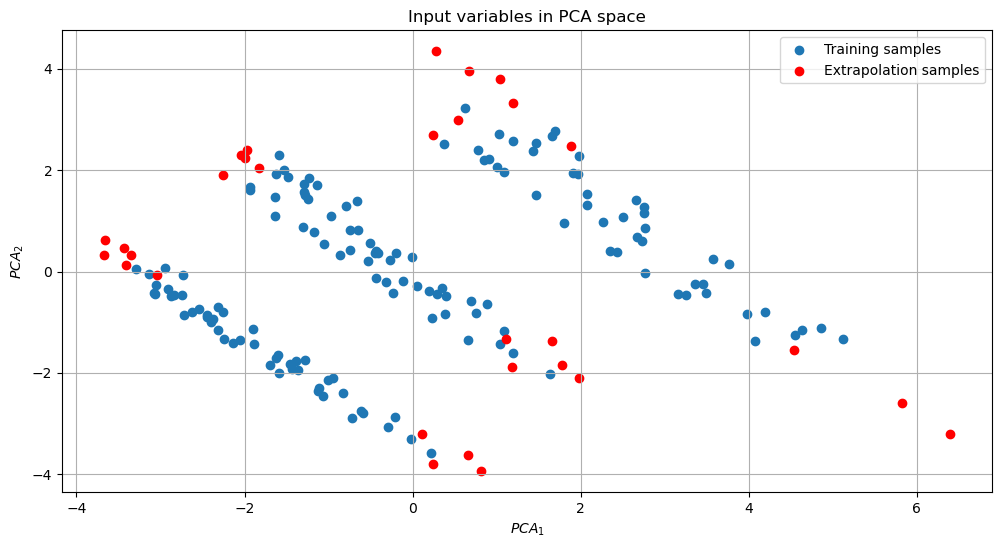

In [28]:
extra_htp.visualizeOutliers()

Extrapolation samples identified using Mahalanobis distances are highlighted with red in figure. Note that these samples are located in the outermost of their respective distributions, and represent extreme input values.

Fit models

In [29]:
extra_htp.addModel(u.getANN(), 'ANN')
extra_htp.addModel(u.getLwr(), 'LWR')
extra_htp.addModel(u.getGBM(), 'GBM')

Fitting 3 folds for each of 72 candidates, totalling 216 fits


d:\conda_envs\ann\lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [0.77898407 0.71241602 0.79356429 0.78407271 0.73698263 0.78831789
 0.79096181 0.7671787  0.78158939 0.8023166  0.74806584 0.77728223
 0.78142264 0.79485102 0.7926783  0.76973955 0.79673199 0.78823927
 0.78236936 0.7956172  0.78207215 0.80349141 0.78977127 0.77716626
 0.79428596 0.69675351 0.02820184 0.81678368 0.57718301 0.51343679
 0.24718376 0.68608011 0.07036653 0.80155014 0.69840829 0.07800626
 0.79524173 0.76553355 0.02820194 0.81051997 0.79872382 0.51298494
 0.45375375        nan 0.07036534 0.798071   0.77631061 0.07800654
 0.74610754 0.72027652 0.72976161 0.76952305 0.57707365 0.70446264
 0.77498379 0.70290143 0.79886858 0.77903714 0.66388155 0.76549095
 0.75363379 0.73774195 0.73013927 0.77537094 0.71938306 0.70506602
 0.77569204 0.7400467  0.79875605 0.7766494  0.79144666 0.7656426 ]
  warnings.warn(


Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 413
[LightGBM] [Info] Number of data points in the train set: 144, number of used features: 10
[LightGBM] [Info] Start training from score 4846.080651


Test results

In [30]:
extra_htp.displayAllModelTestResults()

,ANN,LWR,GBM
R2,0.707239,0.758915,0.500685
RMSE,799.857079,725.841152,1044.584141
MAE,624.961025,534.330825,679.639973
MAPE,0.104169,0.089451,0.105882
Bias%,-0.052395,-0.061961,-0.105651
WAPE%,0.105628,0.087985,0.108470
Pearson-R,0.757824,0.818665,0.708316


Prediction Plots

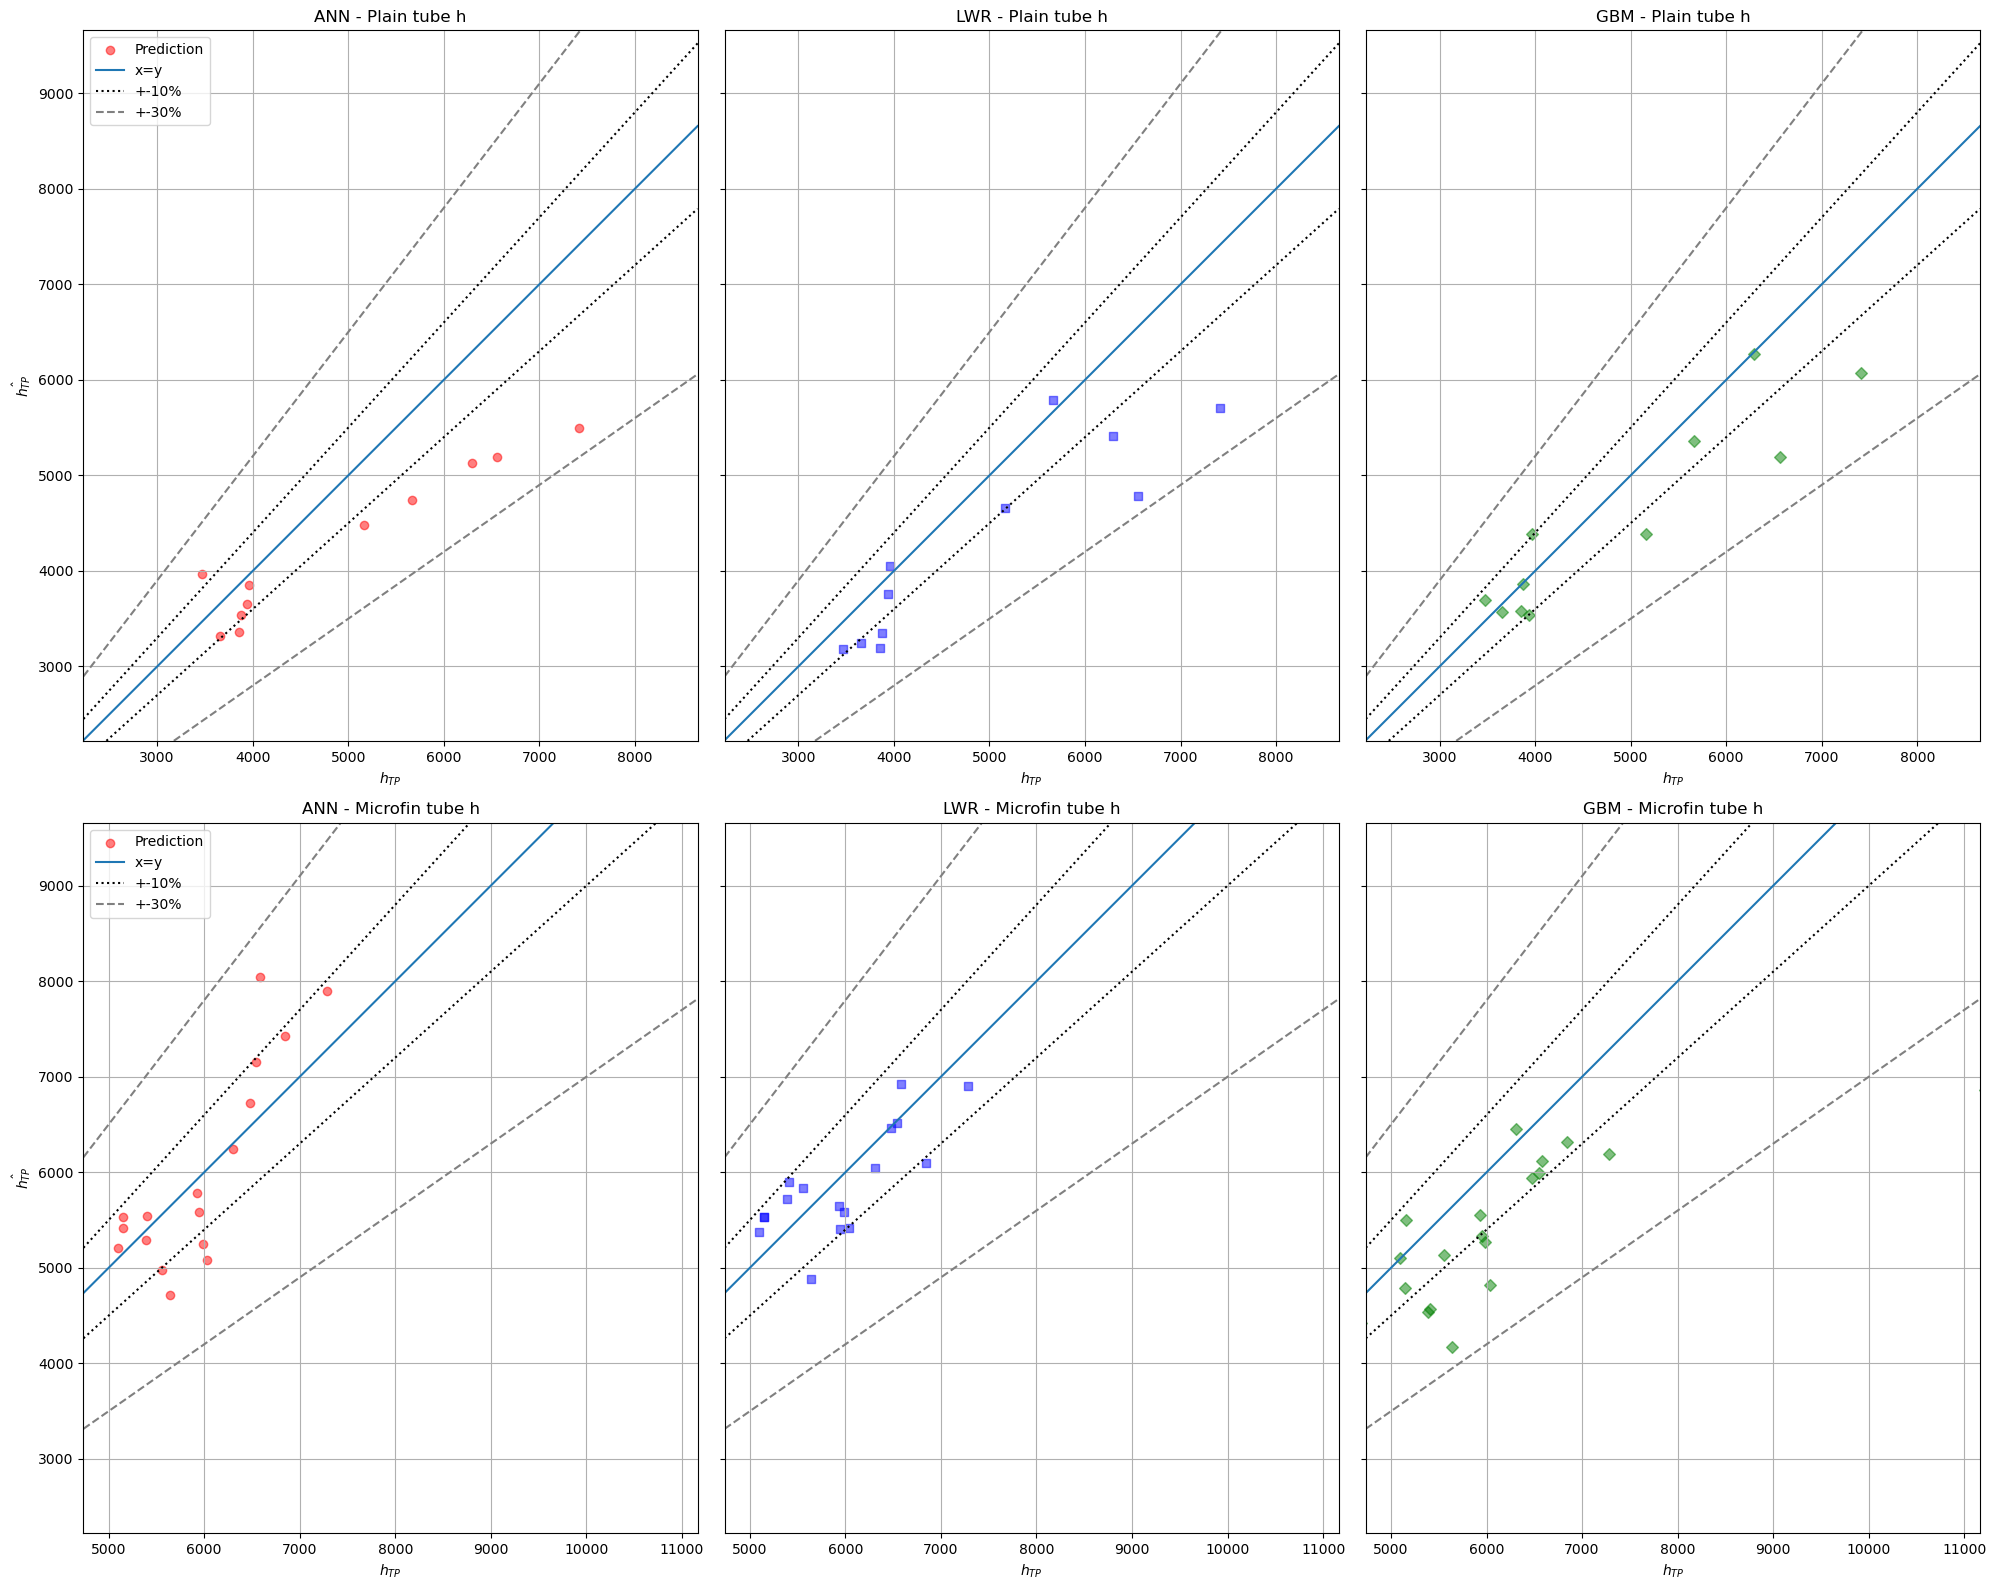

In [31]:
extra_htp.plot_predictions()

In [32]:
for m in extra_htp.models_cv:
    _ = u.process_ann_results(extra_htp.models_cv[m], m)[0]
    _.to_csv("../output/htp_outliers_{}.csv".format(m), index=False)
    display(_.sort_values("test_R2", ascending=False).head(15))

,fit_time,score_time,test_R2,train_R2,test_RMSE,train_RMSE,test_MAE,train_MAE,test_MAPE,train_MAPE,test_Bias%,train_Bias%,test_WAPE%,train_WAPE%,test_Pearson-R,train_Pearson-R
ANN,,,,,,,,,,,,,,,,
"((regressor activation, logistic), (regressor alpha, 0.01), (regressor hidden_layer_sizes, (10, 10)), (regressor solver, adam), (regressor tol, 1e-05))",3.648936,0.015333,0.793934,0.952267,-492.304627,-239.622118,-357.865631,-175.843747,-0.070600,-0.036175,0.011260,0.000138,-0.072835,-0.036305,0.810520,0.952449
"((regressor activation, tanh), (regressor alpha, 0.0001), (regressor hidden_layer_sizes, (128, 64, 32, 16, 8)), (regressor solver, sgd), (regressor tol, 1e-05))",7.694964,0.020667,0.793231,0.938721,-494.323440,-269.634624,-334.728881,-190.955355,-0.065834,-0.038559,0.011798,0.000659,-0.067963,-0.039615,0.798869,0.939085
"((regressor activation, tanh), (regressor alpha, 0.01), (regressor hidden_layer_sizes, (128, 64, 32, 16, 8)), (regressor solver, sgd), (regressor tol, 1e-05))",7.037208,0.015338,0.793162,0.938176,-494.393257,-270.850880,-334.832605,-191.700041,-0.065859,-0.038702,0.011782,0.000665,-0.067976,-0.039764,0.798756,0.938552
"((regressor activation, logistic), (regressor alpha, 0.0001), (regressor hidden_layer_sizes, (10, 10)), (regressor solver, adam), (regressor tol, 1e-05))",4.290123,0.013845,0.793053,0.962632,-495.373331,-211.951600,-357.771095,-155.513510,-0.070702,-0.032307,0.007346,0.000119,-0.072802,-0.032152,0.816784,0.962693
"((regressor activation, relu), (regressor alpha, 0.01), (regressor hidden_layer_sizes, (50, 50)), (regressor solver, adam), (regressor tol, 1e-05))",1.116782,0.013333,0.792514,0.994991,-493.402545,-77.262037,-340.994184,-46.764106,-0.066686,-0.009978,0.012389,0.000035,-0.069727,-0.009681,0.803491,0.995005
"((regressor activation, relu), (regressor alpha, 0.0001), (regressor hidden_layer_sizes, (50, 50)), (regressor solver, adam), (regressor tol, 1e-05))",1.093750,0.018999,0.792471,0.996010,-494.747941,-69.077767,-341.929201,-40.122547,-0.066744,-0.008598,0.010756,-0.000059,-0.069960,-0.008298,0.802317,0.996019
"((regressor activation, relu), (regressor alpha, 0.0001), (regressor hidden_layer_sizes, (20, 20)), (regressor solver, sgd), (regressor tol, 1e-05))",2.875944,0.017670,0.791439,0.930307,-490.496972,-287.356329,-370.987143,-219.491747,-0.075074,-0.045309,0.008296,0.000257,-0.075521,-0.045488,0.793564,0.930683
"((regressor activation, relu), (regressor alpha, 0.01), (regressor hidden_layer_sizes, (20, 20)), (regressor solver, sgd), (regressor tol, 1e-05))",2.323801,0.012333,0.790569,0.928870,-491.587776,-290.099923,-372.474051,-221.809742,-0.075392,-0.045796,0.008247,0.000260,-0.075830,-0.045968,0.792678,0.929262
"((regressor activation, logistic), (regressor alpha, 0.01), (regressor hidden_layer_sizes, (50, 50)), (regressor solver, adam), (regressor tol, 1e-05))",4.434818,0.016009,0.781273,0.965820,-506.992715,-200.110726,-368.961536,-152.559818,-0.074124,-0.032160,0.010965,-0.003464,-0.075651,-0.031804,0.798071,0.966931


,fit_time,score_time,test_R2,test_RMSE,test_MAE,test_MAPE,test_Bias%,test_WAPE%,test_Pearson-R
LWR,,,,,,,,,
"((regressor gamma, 0.7), (regressor n_neighbors, 20))",0.015839,0.120538,-1.797381e+00,-1.029957e+03,-7.615655e+02,-1.550536e-01,-4.244054e-02,-1.681325e-01,0.482850
"((regressor gamma, 1), (regressor n_neighbors, 20))",0.014843,0.124879,-1.893837e+00,-1.049937e+03,-7.769359e+02,-1.585487e-01,-4.067337e-02,-1.720883e-01,0.472831
"((regressor gamma, 2), (regressor n_neighbors, 20))",0.015173,0.109535,-2.507282e+00,-1.171868e+03,-8.638906e+02,-1.767434e-01,-3.580798e-02,-1.936965e-01,0.396987
"((regressor gamma, 3), (regressor n_neighbors, 20))",0.017172,0.093026,-3.681280e+00,-1.386528e+03,-1.009627e+03,-2.060573e-01,-3.169876e-02,-2.297888e-01,0.270022
"((regressor gamma, 0.7), (regressor n_neighbors, 15))",0.015003,0.121046,-4.136441e+00,-1.387004e+03,-1.026763e+03,-2.126206e-01,-6.829617e-02,-2.342704e-01,0.308375
"((regressor gamma, 1), (regressor n_neighbors, 15))",0.014669,0.117375,-4.187275e+00,-1.403415e+03,-1.040404e+03,-2.153774e-01,-6.592988e-02,-2.379018e-01,0.292756
"((regressor gamma, 2), (regressor n_neighbors, 15))",0.016337,0.112704,-4.789906e+00,-1.522304e+03,-1.127186e+03,-2.323346e-01,-5.797959e-02,-2.603336e-01,0.224668
"((regressor gamma, 3), (regressor n_neighbors, 15))",0.015671,0.111863,-6.205677e+00,-1.730464e+03,-1.260697e+03,-2.584962e-01,-5.046744e-02,-2.970169e-01,0.180825
"((regressor gamma, 0.7), (regressor n_neighbors, 10))",0.013334,0.116202,-1.404581e+22,-9.213925e+13,-1.329916e+13,-3.143533e+09,2.690796e+09,-1.508896e+11,0.118028


,fit_time,score_time,test_R2,test_RMSE,test_MAE,test_MAPE,test_Bias%,test_WAPE%,test_Pearson-R
GBM,,,,,,,,,
"((regressor num_leaves, 4), (regressor reg_alpha, 0.1), (regressor reg_lambda, 0.1))",0.323726,0.016183,-1.336175,-1004.054205,-813.633195,-0.168857,-0.008232,-0.167378,0.540969
"((regressor num_leaves, 64), (regressor reg_alpha, 0.1), (regressor reg_lambda, 0.1))",0.369925,0.011841,-1.336175,-1004.054205,-813.633195,-0.168857,-0.008232,-0.167378,0.540969
"((regressor num_leaves, 8), (regressor reg_alpha, 0.1), (regressor reg_lambda, 0.1))",0.316401,0.014002,-1.336175,-1004.054205,-813.633195,-0.168857,-0.008232,-0.167378,0.540969
"((regressor num_leaves, 256), (regressor reg_alpha, 0.1), (regressor reg_lambda, 0.1))",0.416941,0.017669,-1.336175,-1004.054205,-813.633195,-0.168857,-0.008232,-0.167378,0.540969
"((regressor num_leaves, 32), (regressor reg_alpha, 0.1), (regressor reg_lambda, 0.1))",0.326744,0.012505,-1.336175,-1004.054205,-813.633195,-0.168857,-0.008232,-0.167378,0.540969
"((regressor num_leaves, 512), (regressor reg_alpha, 0.1), (regressor reg_lambda, 0.1))",0.348083,0.012333,-1.336175,-1004.054205,-813.633195,-0.168857,-0.008232,-0.167378,0.540969
"((regressor num_leaves, 16), (regressor reg_alpha, 0.1), (regressor reg_lambda, 0.1))",0.329240,0.012838,-1.336175,-1004.054205,-813.633195,-0.168857,-0.008232,-0.167378,0.540969
"((regressor num_leaves, 128), (regressor reg_alpha, 0.1), (regressor reg_lambda, 0.1))",0.353248,0.015335,-1.336175,-1004.054205,-813.633195,-0.168857,-0.008232,-0.167378,0.540969
"((regressor num_leaves, 128), (regressor reg_alpha, 0), (regressor reg_lambda, 0.1))",0.320577,0.012170,-1.336179,-1004.054379,-813.634579,-0.168857,-0.008232,-0.167378,0.540971


## $\Delta$ P

In [33]:
extra_dp = u.OutlierDataset(data=data_dp, X=Xdp, y=ydp)
extra_dp.setRenameFunc(u.renameDP)
extra_dp.setColNames(u.DP_NAMES)
extra_dp.setDec(u.getDecPipeline())
extra_dp.decompose()
extra_dp.setClusterer(u.getClusterer())
extra_dp.setCategories()
extra_dp.split()
extra_dp.setScoring(u.SCORING)



Visualize Outliers

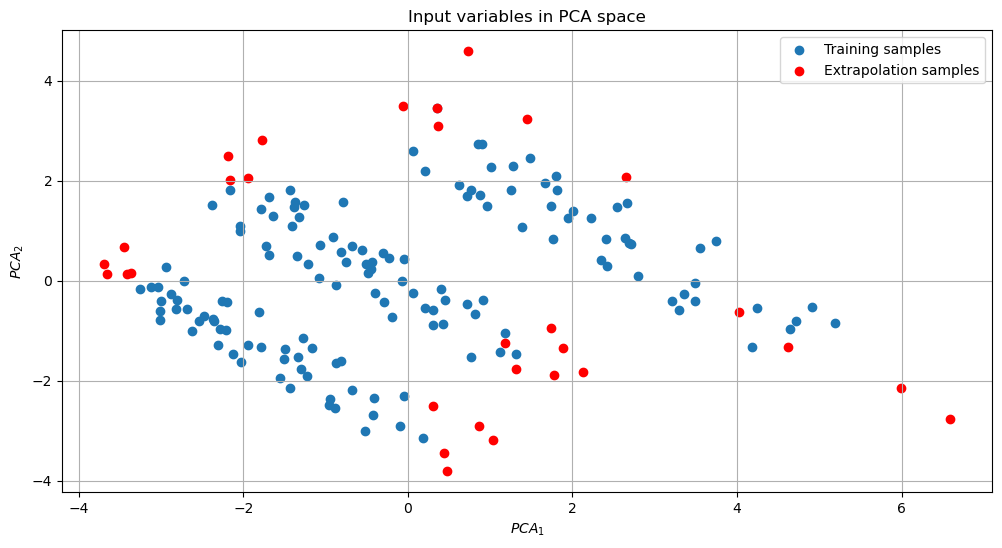

In [34]:
extra_dp.visualizeOutliers()

Fit models

In [35]:
extra_dp.addModel(u.getANN(), 'ANN')
extra_dp.addModel(u.getLwr(), 'LWR')
extra_dp.addModel(u.getGBM(), 'GBM')

Fitting 3 folds for each of 72 candidates, totalling 216 fits


d:\conda_envs\ann\lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [0.86808996 0.86815902 0.90764041 0.92419342 0.8967049  0.90623628
 0.89756678 0.89341057 0.92498483 0.90777687 0.86733979 0.92455065
 0.86956766 0.88666369 0.90769626 0.92626192 0.92489822 0.90627105
 0.89616763 0.90610406 0.92438977 0.90894447 0.90546515 0.92456425
 0.91861944 0.88231583 0.05210524 0.91749343 0.85127086 0.90961612
 0.5062742  0.83881303 0.0738876  0.89139955 0.83857695 0.06263558
 0.91924845 0.87908045 0.05210438 0.92084219 0.89459699 0.90960117
 0.86929825        nan 0.07388662 0.902284   0.8965009  0.06263607
 0.89562544 0.81731774 0.91396306 0.93260067 0.85706864 0.90969003
 0.89152231 0.86694569 0.92463521 0.88472386 0.84496384 0.92088388
 0.89879026 0.9011023  0.91397154 0.93314849 0.86116384 0.90973718
 0.89067767 0.89604252 0.92467347 0.88549655 0.90584016 0.92082246]
  warnings.warn(


Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 144, number of used features: 10
[LightGBM] [Info] Start training from score 9318.163318


Test results

In [36]:
extra_dp.displayAllModelTestResults()

,ANN,LWR,GBM
R2,0.861390,0.896018,0.790065
RMSE,2891.395108,2504.318332,3558.388607
MAE,1939.245863,1475.502880,2535.730988
MAPE,0.203357,0.146356,0.257006
Bias%,-0.017315,-0.039206,-0.062514
WAPE%,0.189023,0.134654,0.244384
Pearson-R,0.882843,0.912649,0.846054


Prediction Plots

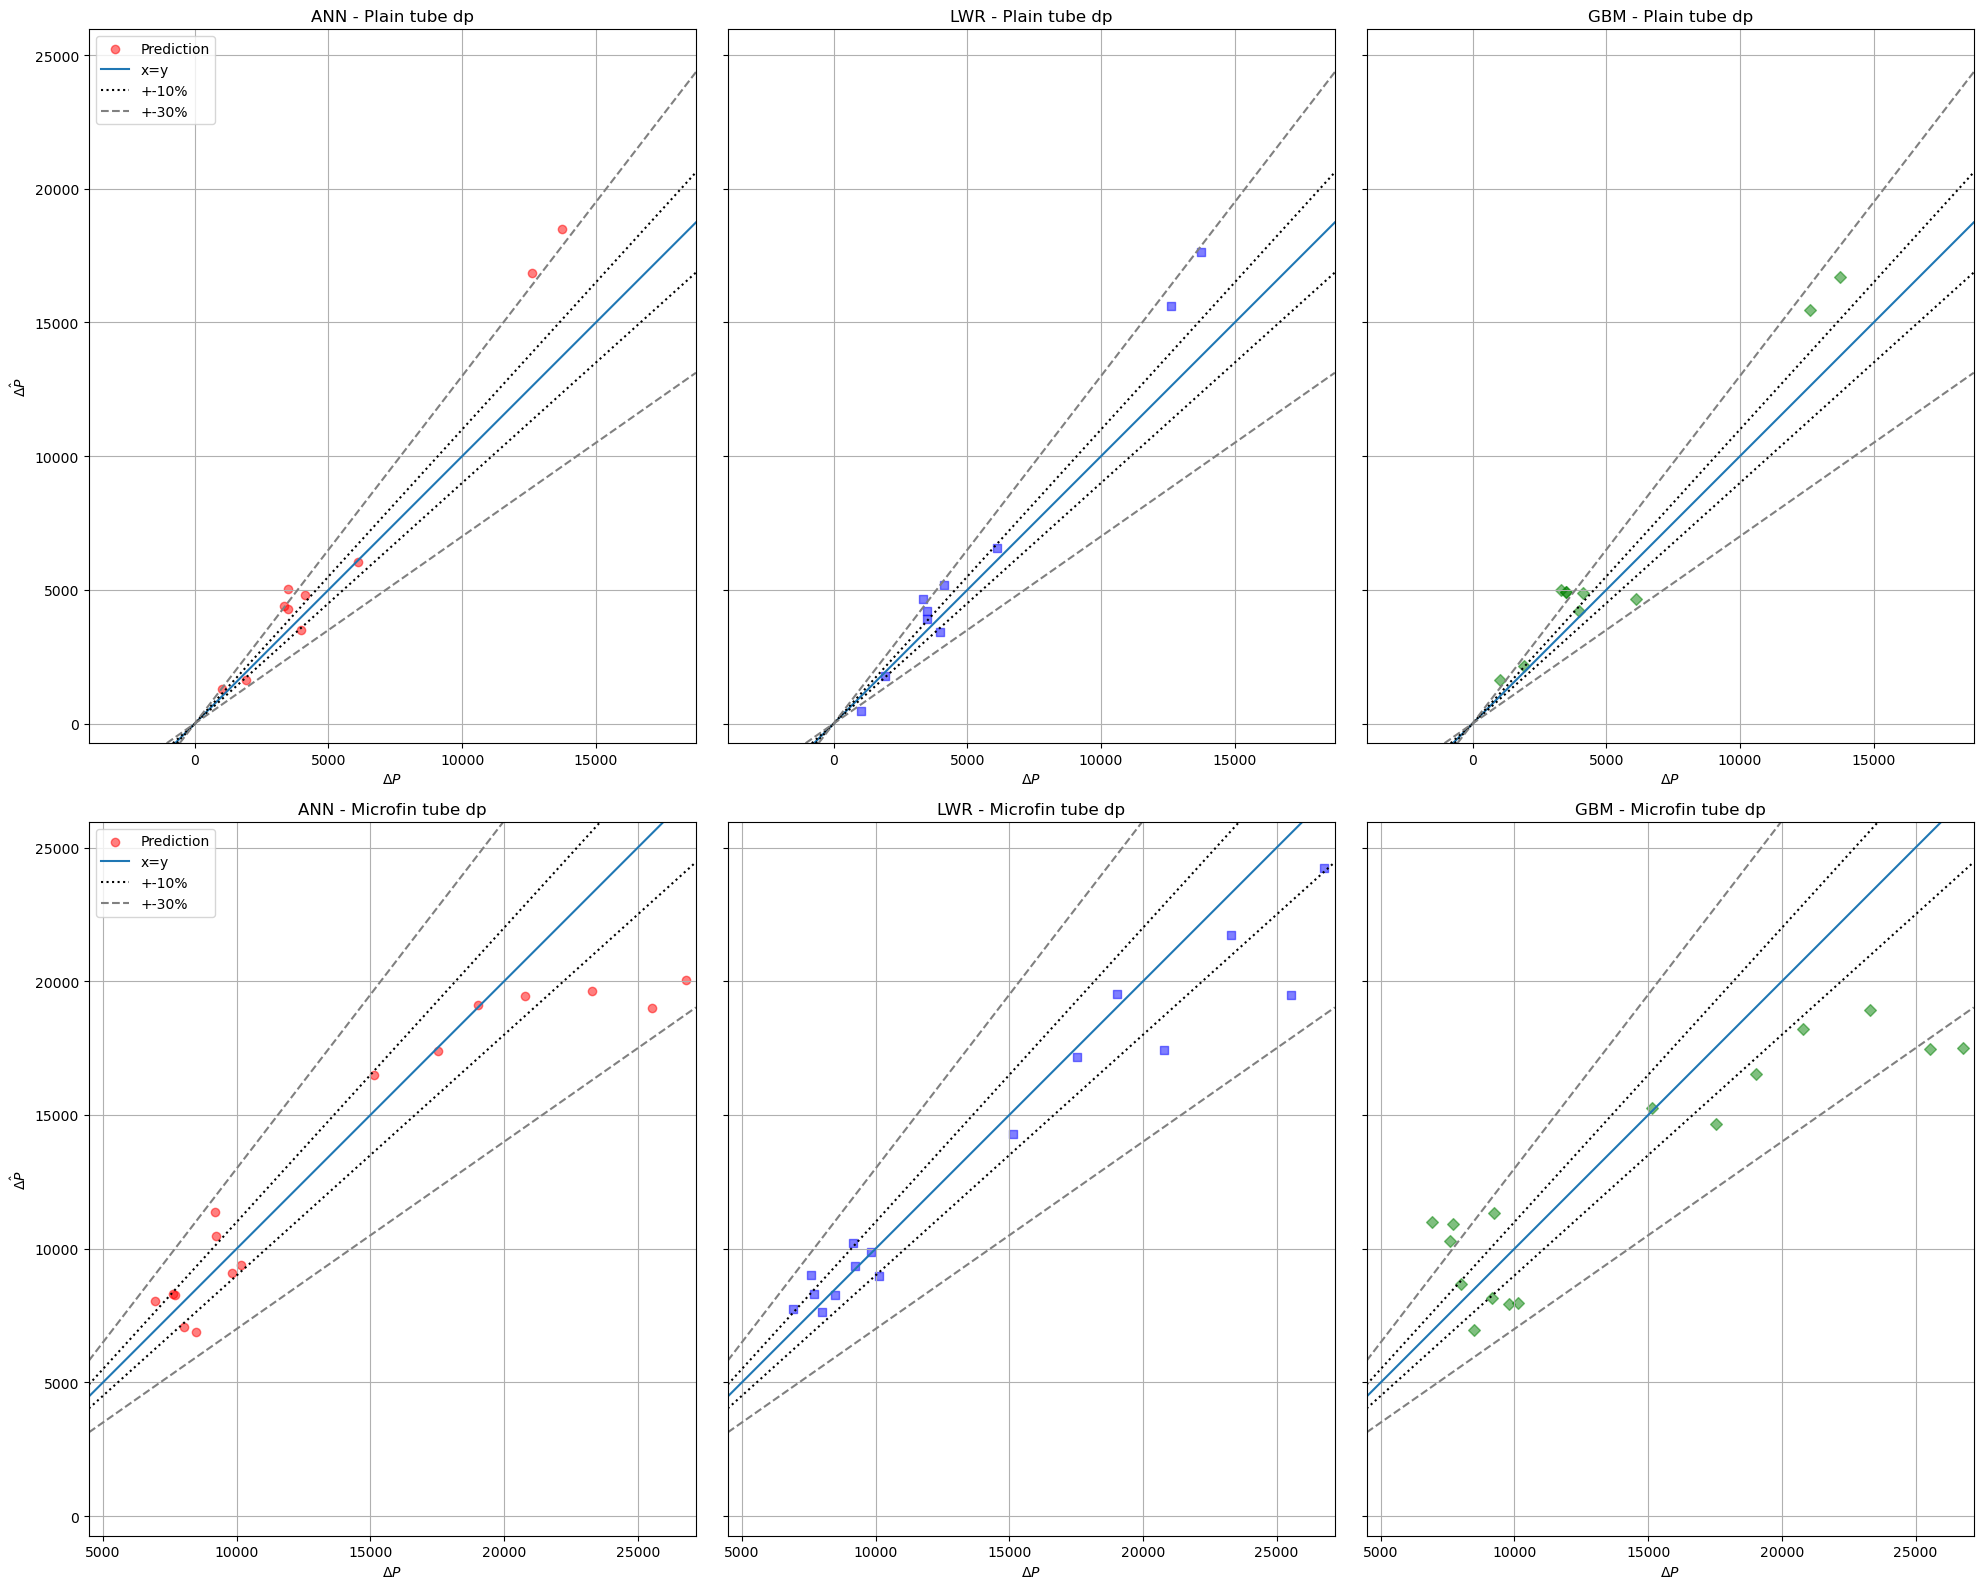

In [37]:
extra_dp.plot_predictions(target_label='\Delta P')

In [38]:
for m in extra_dp.models_cv:
    _ = u.process_ann_results(extra_dp.models_cv[m], m)[0]
    _.to_csv("../output/dp_outliers_{}.csv".format(m), index=False)
    display(_.sort_values("test_R2", ascending=False).head(15))

,fit_time,score_time,test_R2,train_R2,test_RMSE,train_RMSE,test_MAE,train_MAE,test_MAPE,train_MAPE,test_Bias%,train_Bias%,test_WAPE%,train_WAPE%,test_Pearson-R,train_Pearson-R
ANN,,,,,,,,,,,,,,,,
"((regressor activation, tanh), (regressor alpha, 0.01), (regressor hidden_layer_sizes, (10, 10)), (regressor solver, adam), (regressor tol, 1e-05))",1.407166,0.012342,0.927993,0.973806,-1420.951549,-850.833175,-963.838712,-611.520826,-0.107686,-0.072971,-0.013252,0.000817,-0.106400,-0.066564,0.933148,0.973869
"((regressor activation, tanh), (regressor alpha, 0.0001), (regressor hidden_layer_sizes, (10, 10)), (regressor solver, adam), (regressor tol, 1e-05))",1.524594,0.013333,0.927012,0.975194,-1430.588924,-824.550095,-967.549225,-596.712101,-0.107596,-0.071689,-0.014436,0.000754,-0.106944,-0.064992,0.932601,0.975252
"((regressor activation, relu), (regressor alpha, 0.01), (regressor hidden_layer_sizes, (50, 50)), (regressor solver, sgd), (regressor tol, 1e-05))",1.161942,0.014179,0.922524,0.962275,-1458.008216,-1029.949837,-1040.638015,-724.781323,-0.116383,-0.086860,0.000709,0.001293,-0.116583,-0.079774,0.924564,0.962339
"((regressor activation, relu), (regressor alpha, 0.0001), (regressor hidden_layer_sizes, (50, 50)), (regressor solver, sgd), (regressor tol, 1e-05))",1.227940,0.012999,0.922513,0.962348,-1458.097150,-1028.954261,-1040.627789,-723.985090,-0.116382,-0.086784,0.000696,0.001284,-0.116584,-0.079684,0.924551,0.962410
"((regressor activation, relu), (regressor alpha, 0.01), (regressor hidden_layer_sizes, (10, 10)), (regressor solver, adam), (regressor tol, 1e-05))",1.498527,0.015338,0.921921,0.982003,-1466.049577,-709.713726,-1054.610147,-507.627816,-0.123934,-0.064203,0.009841,0.001307,-0.116093,-0.055372,0.926262,0.982021
"((regressor activation, relu), (regressor alpha, 0.0001), (regressor hidden_layer_sizes, (10, 10)), (regressor solver, adam), (regressor tol, 1e-05))",1.500829,0.019513,0.919054,0.982209,-1492.778949,-701.185925,-1073.562048,-507.241348,-0.127420,-0.065626,0.006360,0.001109,-0.118353,-0.055327,0.924193,0.982221
"((regressor activation, tanh), (regressor alpha, 0.01), (regressor hidden_layer_sizes, (128, 64, 32, 16, 8)), (regressor solver, sgd), (regressor tol, 1e-05))",2.508145,0.015671,0.918638,0.956322,-1508.028450,-1109.299712,-1019.929326,-790.717472,-0.123251,-0.098065,-0.006702,0.000149,-0.114256,-0.087101,0.924673,0.956394
"((regressor activation, tanh), (regressor alpha, 0.0001), (regressor hidden_layer_sizes, (128, 64, 32, 16, 8)), (regressor solver, sgd), (regressor tol, 1e-05))",2.660914,0.014999,0.918561,0.956518,-1508.728496,-1106.789057,-1019.825482,-788.884753,-0.123212,-0.097867,-0.006776,0.000136,-0.114286,-0.086900,0.924635,0.956590
"((regressor activation, relu), (regressor alpha, 0.0001), (regressor hidden_layer_sizes, (128, 64, 32, 16, 8)), (regressor solver, sgd), (regressor tol, 1e-05))",3.894258,0.016842,0.918302,0.975373,-1505.810371,-833.039317,-1014.910239,-573.176453,-0.126853,-0.074841,-0.009765,-0.001177,-0.115466,-0.063245,0.924985,0.975473


,fit_time,score_time,test_R2,test_RMSE,test_MAE,test_MAPE,test_Bias%,test_WAPE%,test_Pearson-R
LWR,,,,,,,,,
"((regressor gamma, 0.7), (regressor n_neighbors, 20))",0.015333,0.103208,5.247881e-01,-3.267325e+03,-2.515228e+03,-3.259504e-01,-7.342846e-02,-2.991593e-01,0.812996
"((regressor gamma, 1), (regressor n_neighbors, 20))",0.014687,0.129042,5.231104e-01,-3.271270e+03,-2.521119e+03,-3.278677e-01,-7.153125e-02,-3.005908e-01,0.812209
"((regressor gamma, 2), (regressor n_neighbors, 20))",0.014840,0.111866,4.944940e-01,-3.358905e+03,-2.584788e+03,-3.375093e-01,-6.487361e-02,-3.079258e-01,0.798693
"((regressor gamma, 3), (regressor n_neighbors, 20))",0.014673,0.091193,4.215235e-01,-3.574794e+03,-2.768081e+03,-3.543384e-01,-5.692417e-02,-3.233009e-01,0.768768
"((regressor gamma, 0.7), (regressor n_neighbors, 15))",0.011675,0.109868,2.032467e-01,-4.152478e+03,-3.245791e+03,-4.418121e-01,-7.286223e-02,-3.781489e-01,0.677470
"((regressor gamma, 1), (regressor n_neighbors, 15))",0.012667,0.119383,1.841580e-01,-4.190702e+03,-3.257062e+03,-4.425997e-01,-6.937273e-02,-3.757572e-01,0.673293
"((regressor gamma, 2), (regressor n_neighbors, 15))",0.015670,0.116882,9.201454e-02,-4.373211e+03,-3.310112e+03,-4.459962e-01,-5.797441e-02,-3.687244e-01,0.653752
"((regressor gamma, 3), (regressor n_neighbors, 15))",0.017001,0.106533,-4.308087e-02,-4.632757e+03,-3.460646e+03,-4.572057e-01,-4.709497e-02,-3.719772e-01,0.629497
"((regressor gamma, 0.7), (regressor n_neighbors, 10))",0.008842,0.105200,-7.089062e-01,-5.817914e+03,-4.162265e+03,-5.471307e-01,-7.155942e-02,-5.215826e-01,0.560206


,fit_time,score_time,test_R2,test_RMSE,test_MAE,test_MAPE,test_Bias%,test_WAPE%,test_Pearson-R
GBM,,,,,,,,,
"((regressor num_leaves, 32), (regressor reg_alpha, 5), (regressor reg_lambda, 0))",0.324402,0.011999,0.802511,-2064.351586,-1493.567136,-0.167993,0.016376,-0.158465,0.902762
"((regressor num_leaves, 128), (regressor reg_alpha, 5), (regressor reg_lambda, 0))",0.338731,0.012334,0.802511,-2064.351586,-1493.567136,-0.167993,0.016376,-0.158465,0.902762
"((regressor num_leaves, 8), (regressor reg_alpha, 5), (regressor reg_lambda, 0))",0.291225,0.012334,0.802511,-2064.351586,-1493.567136,-0.167993,0.016376,-0.158465,0.902762
"((regressor num_leaves, 64), (regressor reg_alpha, 5), (regressor reg_lambda, 0))",0.285894,0.011666,0.802511,-2064.351586,-1493.567136,-0.167993,0.016376,-0.158465,0.902762
"((regressor num_leaves, 16), (regressor reg_alpha, 5), (regressor reg_lambda, 0))",0.342575,0.012666,0.802511,-2064.351586,-1493.567136,-0.167993,0.016376,-0.158465,0.902762
"((regressor num_leaves, 512), (regressor reg_alpha, 5), (regressor reg_lambda, 0))",0.377760,0.013003,0.802511,-2064.351586,-1493.567136,-0.167993,0.016376,-0.158465,0.902762
"((regressor num_leaves, 4), (regressor reg_alpha, 5), (regressor reg_lambda, 0))",0.321567,0.012003,0.802511,-2064.351586,-1493.567136,-0.167993,0.016376,-0.158465,0.902762
"((regressor num_leaves, 256), (regressor reg_alpha, 5), (regressor reg_lambda, 0))",0.305234,0.013172,0.802511,-2064.351586,-1493.567136,-0.167993,0.016376,-0.158465,0.902762
"((regressor num_leaves, 4), (regressor reg_alpha, 3), (regressor reg_lambda, 0))",0.322737,0.016506,0.801963,-2066.737275,-1495.353999,-0.168294,0.016235,-0.158712,0.901666


In [42]:
try:
    htp.to_pickle("../output/htp.pkl")
    dp.to_pickle("../output/dp.pkl")
    extra_htp.to_pickle("../output/extra_htp.pkl")
    extra_dp.to_pickle("../output/extra_dp.pkl")
except Exception as e:
    # Print exception with traceback
    print(e)
    import traceback
    traceback.print_exc()

Can't pickle <function bias at 0x0000023BB92473A0>: it's not the same object as utils.bias


Traceback (most recent call last):
  File "C:\Users\berk_\AppData\Local\Temp\ipykernel_29176\870203477.py", line 2, in <module>
    htp.to_pickle("../output/htp.pkl")
  File "c:\Users\berk_\OneDrive\JWorkspace\cihan\ml_calismasi\notebook\utils.py", line 226, in to_pickle
    pickle.dump(self, f)
_pickle.PicklingError: Can't pickle <function bias at 0x0000023BB92473A0>: it's not the same object as utils.bias


In [40]:
now = time.time()
print("Complete")
print(f"Time elapsed: {now-then:.2f} seconds")

Complete
Time elapsed: 548.02 seconds
